# Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import sklearn.metrics as metrics
from xgboost import XGBRegressor
from xgboost import plot_importance
from matplotlib import pyplot
from sklearn.model_selection import GridSearchCV
from sklearn.dummy import DummyRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

# Combine All the Files



In [ ]:
dfset1=pd.read_csv("set1.csv")
dfset2=pd.read_csv("set2.csv")
dfset3= pd.read_csv("set3.csv")

dfList=[dfset2,dfset3]
df=dfset1

for i in dfList:
  #dfTemp=pd.read_csv(i)
  dfTemp=i
  df=df.append(dfTemp)

df=df.drop('Unnamed: 0', 1)  
df.to_csv("group27Airbnb.csv")  

NameError: ignored

In [ ]:
df

,Unnamed: 0.1,TITLE,AVERAGE RATING,NUMBER OF REVIEWS,SUPERHOST,LOCATION,DESCRIPTION,NUMBER OF ROOMS,PRICE PER NIGHT,ADDITIONAL COLUMN,ADDITIONAL COLUMN2,ADDITIONAL COLUMN3,COUNTY
0,0.0,Dunadry Townhouse - Close To Airport & Motorway,4.56,(56 reviews),Superhost,"Muckamore, Co Antrim, United Kingdom",Entire residential home hosted by Gary,4 guests · 2 bedrooms · 3 beds · 1 bathroom,€42,NaN,NaN,NaN,NaN
1,1.0,"Apple Barn, spacious rural retreat",4.97,(61 reviews),Superhost,"Dunadry, Northern Ireland, United Kingdom",Entire cottage hosted by Anne,2 guests · 1 bedroom · 1 bed · 1 bathroom,€65,NaN,NaN,NaN,NaN
2,2.0,Blackberry Loft - a Hidden Gem,4.95,(20 reviews),Superhost,"Templepatrick, Northern Ireland, United Kingdom",Entire guest suite hosted by Olwyn,2 guests · Studio · 2 beds · 1 bathroom,€45,NaN,NaN,NaN,NaN
3,3.0,Lynn's Lodge,4.81,(27 reviews),Superhost,"Randalstown, Northern Ireland, United Kingdom",Entire guest house hosted by Elizabeth,2 guests · 1 bedroom · 1 bed · 1.5 bathrooms,Joined in June 2021,€65,€65,NaN,NaN
4,4.0,"Double Room & Cont. Breakfast - Airport 3km, V...",4.97,(174 reviews),Superhost,"Antrim, Northern Ireland, United Kingdom",Private room in residential home hosted by Mic...,2 guests · 1 bedroom · 1 bed · 1 private bathroom,€31,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3099,NaN,The Red Bridge Cottage,4.93,(216 reviews),Superhost,"County Donegal, Ireland",Entire cottage hosted by Mairead,5 guests · 2 bedrooms · 2 beds · 1 bathroom,€68,NaN,NaN,NaN,7.0
3100,NaN,"Radharc na Coille, Forest view",4.73,(80 reviews),Superhost,"Creeslough, County Donegal, Ireland",Entire guest suite hosted by Carol,5 guests · 1 bedroom · 4 beds · 1 bathroom,€41,NaN,NaN,NaN,7.0
3101,NaN,Doultes traditionally cottage,4.95,(40 reviews),Superhost,"Creeslough, Co. Donegal, Ireland",Entire cottage hosted by Paddy,4 guests · 1 bedroom · 1 bed · 1 bathroom,€53,NaN,NaN,NaN,7.0
3102,NaN,Brownes Sea View Cottage No 1 (Dungloe 14km),4.94,(72 reviews),Superhost,"County Donegal, Ireland",Entire cottage hosted by Elliot,2 guests · 1 bedroom · 1 bed · 1 bathroom,€73,NaN,NaN,NaN,7.0


# Define Functions

In [ ]:
def createCountyColumn(df,defaultValue):
  df.loc[df['LOCATION'].str.contains("Antrim", case=False), 'COUNTY'] = 1
  df.loc[df['LOCATION'].str.contains("Armagh", case=False), 'COUNTY'] = 2
  df.loc[df['LOCATION'].str.contains("Carlow", case=False), 'COUNTY'] = 3
  df.loc[df['LOCATION'].str.contains("Cavan", case=False), 'COUNTY'] = 4
  df.loc[df['LOCATION'].str.contains("Clare", case=False), 'COUNTY'] = 5
  df.loc[df['LOCATION'].str.contains("Cork", case=False), 'COUNTY'] = 6
  df.loc[df['LOCATION'].str.contains("Donegal", case=False), 'COUNTY'] = 7
  df.loc[df['LOCATION'].str.contains("Down", case=False), 'COUNTY'] = 8
  df.loc[df['LOCATION'].str.contains("Dublin", case=False), 'COUNTY'] = 9
  df.loc[df['LOCATION'].str.contains("Fermanagh", case=False), 'COUNTY'] = 10
  df.loc[df['LOCATION'].str.contains("Galway", case=False), 'COUNTY'] = 11
  df.loc[df['LOCATION'].str.contains("Kerry", case=False), 'COUNTY'] = 12
  df.loc[df['LOCATION'].str.contains("Kildare", case=False), 'COUNTY'] = 13
  df.loc[df['LOCATION'].str.contains("Kilkenny", case=False), 'COUNTY'] = 14
  df.loc[df['LOCATION'].str.contains("Laois", case=False), 'COUNTY'] = 15
  df.loc[df['LOCATION'].str.contains("Leitrim", case=False), 'COUNTY'] = 16
  df.loc[df['LOCATION'].str.contains("Limerick", case=False), 'COUNTY'] = 17
  df.loc[df['LOCATION'].str.contains("Londonderry", case=False), 'COUNTY'] = 18
  df.loc[df['LOCATION'].str.contains("Derry", case=False), 'COUNTY'] = 18
  df.loc[df['LOCATION'].str.contains("Longford", case=False), 'COUNTY'] = 19
  df.loc[df['LOCATION'].str.contains("Louth", case=False), 'COUNTY'] = 20
  df.loc[df['LOCATION'].str.contains("Mayo", case=False), 'COUNTY'] = 21
  df.loc[df['LOCATION'].str.contains("Meath", case=False), 'COUNTY'] = 22
  df.loc[df['LOCATION'].str.contains("Monaghan", case=False), 'COUNTY'] = 23
  df.loc[df['LOCATION'].str.contains("Offaly", case=False), 'COUNTY'] = 24
  df.loc[df['LOCATION'].str.contains("Roscommon", case=False), 'COUNTY'] = 25
  df.loc[df['LOCATION'].str.contains("Sligo", case=False), 'COUNTY'] = 26
  df.loc[df['LOCATION'].str.contains("Tipperary", case=False), 'COUNTY'] = 27
  df.loc[df['LOCATION'].str.contains("Tyrone", case=False), 'COUNTY'] = 28
  df.loc[df['LOCATION'].str.contains("Waterford", case=False), 'COUNTY'] = 29
  df.loc[df['LOCATION'].str.contains("Westmeath", case=False), 'COUNTY'] = 30
  df.loc[df['LOCATION'].str.contains("Wexford", case=False), 'COUNTY'] = 31
  df.loc[df['LOCATION'].str.contains("Wicklow", case=False), 'COUNTY'] = 32

  df['COUNTY'] = df['COUNTY'].replace(np.nan, defaultValue)
  return df

def defRoomCols(data):
    data["GUESTS"] = np.nan
    data["BEDROOMS"] = np.nan
    data["BEDS"] = np.nan
    data["BATHROOMS"] = np.nan
    for index, row in data.iterrows():
#         print(index)
        if (row['STUDIO']):
            result = re.search(r"((\d) (guests|guest) · )?(Studio · )?((\d) (bed|beds) · )?((\d.?\d?) (\w* *(bathrooms|bathroom)))?", row['NUMBER OF ROOMS'])
#             print([result.group(2),'0',result.group(7),result.group(10)])
            data.loc[index, 'GUESTS'], data.loc[index, 'BEDROOMS'], data.loc[index, 'BEDS'], data.loc[index, 'BATHROOMS'] = [result.group(2),'0',result.group(6),result.group(9)]
        else:
            result = re.search(r"((\d) (guests|guest) · )?((\d) (\w*(bedroom|bedrooms)) · )?((\d) (bed|beds) · )?((\d.?\d?) (\w* *(bathrooms|bathroom)))?", row['NUMBER OF ROOMS'])
#             print([result.group(2),result.group(5),result.group(9),result.group(12)])
            data.loc[index, 'GUESTS'], data.loc[index, 'BEDROOMS'], data.loc[index, 'BEDS'], data.loc[index, 'BATHROOMS'] = [result.group(2),result.group(5),result.group(9),result.group(12)]
    return data  

def replaceNoneValues(data):
    data['GUESTS'] = data['GUESTS'].fillna(0)
    data['BEDROOMS'] = data['BEDROOMS'].fillna(0)
    data['BEDS'] = data['BEDS'].fillna(0)
    data['BATHROOMS'] = data['BATHROOMS'].fillna(0)

# Creating datasets with County Column

In [ ]:
#The files here are obtained from the county list, which consists of 32 lists. 
#All data are collected on csv named "set1","set2","set3".
df0=pd.read_csv("County0.csv")
df4=pd.read_csv("County4.csv")
df5=pd.read_csv("County5.csv")
df6=pd.read_csv("County6.csv")
df8=pd.read_csv("County8.csv")
df10=pd.read_csv("County10.csv")

df0=createCountyColumn(df0,1)
df4=createCountyColumn(df4,5)
df5=createCountyColumn(df5,6)
df6=createCountyColumn(df6,18)
df8=createCountyColumn(df8,8)
df10=createCountyColumn(df10,10)

In [ ]:
#csvList=["County4.csv","County5.csv","County6.csv","County8.csv","County10.csv"]
dfList=[df4,df5,df6,df8,df10]
#df=pd.read_csv("County0.csv")
df=df0

id=0
for i in dfList:
  #dfTemp=pd.read_csv(i)
  dfTemp=i
  df=df.append(dfTemp)

df=df.drop('Unnamed: 0', 1)  

In [ ]:
df

,TITLE,AVERAGE RATING,NUMBER OF REVIEWS,SUPERHOST,LOCATION,DESCRIPTION,NUMBER OF ROOMS,PRICE PER NIGHT,ADDITIONAL COLUMN,ADDITIONAL COLUMN2,ADDITIONAL COLUMN3,COUNTY
0,Dunadry Townhouse - Close To Airport & Motorway,4.56,(56 reviews),Superhost,"Muckamore, Co Antrim, United Kingdom",Entire residential home hosted by Gary,4 guests · 2 bedrooms · 3 beds · 1 bathroom,€42,NaN,NaN,NaN,1.0
1,"Apple Barn, spacious rural retreat",4.97,(61 reviews),Superhost,"Dunadry, Northern Ireland, United Kingdom",Entire cottage hosted by Anne,2 guests · 1 bedroom · 1 bed · 1 bathroom,€65,NaN,NaN,NaN,1.0
2,Blackberry Loft - a Hidden Gem,4.95,(20 reviews),Superhost,"Templepatrick, Northern Ireland, United Kingdom",Entire guest suite hosted by Olwyn,2 guests · Studio · 2 beds · 1 bathroom,€45,NaN,NaN,NaN,1.0
3,Lynn's Lodge,4.81,(27 reviews),Superhost,"Randalstown, Northern Ireland, United Kingdom",Entire guest house hosted by Elizabeth,2 guests · 1 bedroom · 1 bed · 1.5 bathrooms,Joined in June 2021,€65,€65,NaN,1.0
4,"Double Room & Cont. Breakfast - Airport 3km, V...",4.97,(174 reviews),Superhost,"Antrim, Northern Ireland, United Kingdom",Private room in residential home hosted by Mic...,2 guests · 1 bedroom · 1 bed · 1 private bathroom,€31,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
294,Lakeside Large Family Holiday Home,4.44,(9 reviews),Superhost,"Belturbet, County Cavan, Ireland",Entire residential home hosted by Kevin,10 guests · 5 bedrooms · 7 beds · 4.5 bathrooms,€139,NaN,NaN,NaN,4.0
295,Bedroom No 1 - Double Room with Shared Bathroom,none,none,Superhost,"Enniskillen, Co Fermanagh, United Kingdom",Private room in residential home hosted by Carmel,2 guests · 1 bedroom · 1 bed · 1 shared bathroom,€71,NaN,NaN,NaN,10.0
296,The Loft At Arvalee Retreat,5.0,(8 reviews),Superhost,"Omagh, Northern Ireland, United Kingdom",Entire loft hosted by Rosemary,5 guests · 2 bedrooms · 3 beds · 2 bathrooms,Joined in May 2016,€74,€74,NaN,10.0
297,Platinum Lakeside Lodge at Mullans Bay,NaN,1 review,Superhost,"Kesh, Northern Ireland, United Kingdom",Entire chalet hosted by Adrian,4 guests · 2 bedrooms · 2 beds · 2 bathrooms,Joined in August 2016,€247,€247,NaN,10.0


In [ ]:
df["COUNTY"].unique()

array([ 1.,  5., 18., 11., 27., 17.,  6., 12., 29.,  7.,  8., 10., 16.,
        4., 28.])

In [ ]:
df.to_csv("set1.csv")

# Read Merged CSV

Read group27Airbnb.csv


In [ ]:
df= pd.read_csv("group27Airbnb.csv")
df

,Unnamed: 0,Unnamed: 0.1,TITLE,AVERAGE RATING,NUMBER OF REVIEWS,SUPERHOST,LOCATION,DESCRIPTION,NUMBER OF ROOMS,PRICE PER NIGHT,ADDITIONAL COLUMN,ADDITIONAL COLUMN2,ADDITIONAL COLUMN3,COUNTY
0,0,0.0,Dunadry Townhouse - Close To Airport & Motorway,4.56,(56 reviews),Superhost,"Muckamore, Co Antrim, United Kingdom",Entire residential home hosted by Gary,4 guests · 2 bedrooms · 3 beds · 1 bathroom,€42,NaN,NaN,NaN,NaN
1,1,1.0,"Apple Barn, spacious rural retreat",4.97,(61 reviews),Superhost,"Dunadry, Northern Ireland, United Kingdom",Entire cottage hosted by Anne,2 guests · 1 bedroom · 1 bed · 1 bathroom,€65,NaN,NaN,NaN,NaN
2,2,2.0,Blackberry Loft - a Hidden Gem,4.95,(20 reviews),Superhost,"Templepatrick, Northern Ireland, United Kingdom",Entire guest suite hosted by Olwyn,2 guests · Studio · 2 beds · 1 bathroom,€45,NaN,NaN,NaN,NaN
3,3,3.0,Lynn's Lodge,4.81,(27 reviews),Superhost,"Randalstown, Northern Ireland, United Kingdom",Entire guest house hosted by Elizabeth,2 guests · 1 bedroom · 1 bed · 1.5 bathrooms,Joined in June 2021,€65,€65,NaN,NaN
4,4,4.0,"Double Room & Cont. Breakfast - Airport 3km, V...",4.97,(174 reviews),Superhost,"Antrim, Northern Ireland, United Kingdom",Private room in residential home hosted by Mic...,2 guests · 1 bedroom · 1 bed · 1 private bathroom,€31,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8262,3099,NaN,The Red Bridge Cottage,4.93,(216 reviews),Superhost,"County Donegal, Ireland",Entire cottage hosted by Mairead,5 guests · 2 bedrooms · 2 beds · 1 bathroom,€68,NaN,NaN,NaN,7.0
8263,3100,NaN,"Radharc na Coille, Forest view",4.73,(80 reviews),Superhost,"Creeslough, County Donegal, Ireland",Entire guest suite hosted by Carol,5 guests · 1 bedroom · 4 beds · 1 bathroom,€41,NaN,NaN,NaN,7.0
8264,3101,NaN,Doultes traditionally cottage,4.95,(40 reviews),Superhost,"Creeslough, Co. Donegal, Ireland",Entire cottage hosted by Paddy,4 guests · 1 bedroom · 1 bed · 1 bathroom,€53,NaN,NaN,NaN,7.0
8265,3102,NaN,Brownes Sea View Cottage No 1 (Dungloe 14km),4.94,(72 reviews),Superhost,"County Donegal, Ireland",Entire cottage hosted by Elliot,2 guests · 1 bedroom · 1 bed · 1 bathroom,€73,NaN,NaN,NaN,7.0


# Data Cleaning

## Remove Duplicated Rows

In [ ]:
rowList=[]
for indexVal, rowVal in df.iterrows():
  rowVal['TITLE']= rowVal['TITLE'].replace("\n","")
  rowList.append(rowVal['TITLE'])

df["TITLE"]=rowList  

In [ ]:
df.sort_values("TITLE", inplace = True)
df.drop_duplicates(subset ="TITLE", keep = "first", inplace = True)
df=df.drop('Unnamed: 0', 1)
df

,Unnamed: 0.1,TITLE,AVERAGE RATING,NUMBER OF REVIEWS,SUPERHOST,LOCATION,DESCRIPTION,NUMBER OF ROOMS,PRICE PER NIGHT,ADDITIONAL COLUMN,ADDITIONAL COLUMN2,ADDITIONAL COLUMN3,COUNTY
6791,NaN,""" New to Airbnb "" Refurbished Home, Kilcommon",5.0,(7 reviews),none,"Kilcommon Cross, County Tipperary, Ireland",Entire bungalow hosted by Siobhan,6 guests · 4 bedrooms · 4 beds · 1 bathroom,€120,NaN,NaN,NaN,27.0
4052,NaN,""" New to Airbnb ""Refurbished Home, Kilcommon",5.0,(7 reviews),none,"Kilcommon Cross, County Tipperary, Ireland",Entire bungalow hosted by Siobhan,6 guests · 4 bedrooms · 4 beds · 1 bathroom,€120,NaN,NaN,NaN,27.0
6689,NaN,"""Almaber"". A countryside, 3 bedroomed bungalow.",5.0,(5 reviews),none,"Cashel, County Tipperary, Ireland",Entire bungalow hosted by Bernadette,5 guests · 3 bedrooms · 3 beds · 1.5 bathrooms,€140,NaN,NaN,NaN,27.0
7708,NaN,"""Ashford"", family home near Seaside",4.77,(30 reviews),none,"Wexford, Ireland",Entire residential home hosted by Claire,7 guests · 4 bedrooms · 6 beds · 2 bathrooms,€64,NaN,NaN,NaN,31.0
6558,NaN,"""Carrowview"" Inishcrone Co.Sligo",4.63,(49 reviews),none,"Inishcrone, Sligo, Ireland",Entire cottage hosted by Justin,9 guests · 4 bedrooms · 5 beds · 1 bathroom,€92,NaN,NaN,NaN,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,113.0,⭐️Spacious Double Room⭐️,4.67,(74 reviews),none,"Belfast, Northern Ireland, United Kingdom",Private room in residential home hosted by Ric...,2 guests · 1 bedroom · 1 bed · 1 shared bathroom,€30,NaN,NaN,NaN,NaN
2115,NaN,🐘 Elephant Room 🐘,NaN,2 reviews,Superhost,"Lucan, County Dublin, Ireland",Private room in bed and breakfast hosted by Ma...,2 guests · 1 bedroom · 1 bed · 1 bathroom,Joined in September 2015,€50,€50,NaN,9.0
255,255.0,👌Luxury apartment right in city centre,4.95,(158 reviews),Superhost,"Belfast, Northern Ireland, United Kingdom",Entire apartment hosted by Rosie,4 guests · 2 bedrooms · 2 beds · 1 bathroom,€140,NaN,NaN,NaN,NaN
5268,NaN,"👪 Luxury Loft Family Get Away, N.Ireland Border",5.0,(10 reviews),none,"Tynan, Northern Ireland, United Kingdom",Private room in loft hosted by Colleen,6 guests · 1 bedroom · 3 beds · 1 private bath...,€86,NaN,NaN,NaN,2.0


## For PRICE PER NIGHT Column

In [ ]:
dfreal=df[df['PRICE PER NIGHT'].str.contains("€")]
dfreal

,Unnamed: 0.1,TITLE,AVERAGE RATING,NUMBER OF REVIEWS,SUPERHOST,LOCATION,DESCRIPTION,NUMBER OF ROOMS,PRICE PER NIGHT,ADDITIONAL COLUMN,ADDITIONAL COLUMN2,ADDITIONAL COLUMN3,COUNTY
6791,NaN,""" New to Airbnb "" Refurbished Home, Kilcommon",5.0,(7 reviews),none,"Kilcommon Cross, County Tipperary, Ireland",Entire bungalow hosted by Siobhan,6 guests · 4 bedrooms · 4 beds · 1 bathroom,€120,NaN,NaN,NaN,27.0
4052,NaN,""" New to Airbnb ""Refurbished Home, Kilcommon",5.0,(7 reviews),none,"Kilcommon Cross, County Tipperary, Ireland",Entire bungalow hosted by Siobhan,6 guests · 4 bedrooms · 4 beds · 1 bathroom,€120,NaN,NaN,NaN,27.0
6689,NaN,"""Almaber"". A countryside, 3 bedroomed bungalow.",5.0,(5 reviews),none,"Cashel, County Tipperary, Ireland",Entire bungalow hosted by Bernadette,5 guests · 3 bedrooms · 3 beds · 1.5 bathrooms,€140,NaN,NaN,NaN,27.0
7708,NaN,"""Ashford"", family home near Seaside",4.77,(30 reviews),none,"Wexford, Ireland",Entire residential home hosted by Claire,7 guests · 4 bedrooms · 6 beds · 2 bathrooms,€64,NaN,NaN,NaN,31.0
6558,NaN,"""Carrowview"" Inishcrone Co.Sligo",4.63,(49 reviews),none,"Inishcrone, Sligo, Ireland",Entire cottage hosted by Justin,9 guests · 4 bedrooms · 5 beds · 1 bathroom,€92,NaN,NaN,NaN,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3831,NaN,⭐️En-suite rooms B+B⚡️Fast wifi⚡️Quiet conveni...,4.72,(398 reviews),none,"Limerick, County Limerick, Ireland",Private room in bed and breakfast hosted by Ruth,4 guests · 2 bedrooms · 2 beds · 1 private bat...,€52,NaN,NaN,NaN,17.0
113,113.0,⭐️Spacious Double Room⭐️,4.67,(74 reviews),none,"Belfast, Northern Ireland, United Kingdom",Private room in residential home hosted by Ric...,2 guests · 1 bedroom · 1 bed · 1 shared bathroom,€30,NaN,NaN,NaN,NaN
255,255.0,👌Luxury apartment right in city centre,4.95,(158 reviews),Superhost,"Belfast, Northern Ireland, United Kingdom",Entire apartment hosted by Rosie,4 guests · 2 bedrooms · 2 beds · 1 bathroom,€140,NaN,NaN,NaN,NaN
5268,NaN,"👪 Luxury Loft Family Get Away, N.Ireland Border",5.0,(10 reviews),none,"Tynan, Northern Ireland, United Kingdom",Private room in loft hosted by Colleen,6 guests · 1 bedroom · 3 beds · 1 private bath...,€86,NaN,NaN,NaN,2.0


In [ ]:
dfx=pd.concat([df,dfreal]).drop_duplicates(keep=False)
dfx

,Unnamed: 0.1,TITLE,AVERAGE RATING,NUMBER OF REVIEWS,SUPERHOST,LOCATION,DESCRIPTION,NUMBER OF ROOMS,PRICE PER NIGHT,ADDITIONAL COLUMN,ADDITIONAL COLUMN2,ADDITIONAL COLUMN3,COUNTY
3181,NaN,"""East Wing"" at Chapel View, Thomastown, Kilkenny",4.95,(19 reviews),Superhost,"Thomastown , Kilkenny, Ireland",Entire residential home hosted by Lorraine,4 guests · 2 bedrooms · 2 beds · 1 bathroom,Joined in February 2014,€120,€120,NaN,14.0
2812,NaN,"""Fern Hollow""",4.98,(113 reviews),Superhost,"Rathmore, County Kildare, Ireland",Private room in bed and breakfast hosted by Helen,2 guests · 1 bedroom · 1 bed · 1 shared bathroom,Joined in September 2016,€52,€52,NaN,13.0
5222,NaN,"""The Beeches"" Perfect spot in the ideal location",4.98,(40 reviews),Superhost,"Newry, Mourne and Down, Northern Ireland, Unit...",Entire guest suite hosted by Sheila,3 guests · 1 bedroom · 2 beds · 1 bathroom,Joined in August 2020,€53,€53,NaN,8.0
5866,NaN,"""The Callows"" 3",4.95,(19 reviews),Superhost,"Athlone, County Westmeath, Ireland",Private room in residential home hosted by Marion,2 guests · 1 bedroom · 1 bed · 1.5 bathrooms,Joined in September 2016,€45,€45,NaN,30.0
5920,NaN,"""The Callows"" 2",4.84,(68 reviews),Superhost,"Athlone, County Westmeath, Ireland",Private room in residential home hosted by Marion,2 guests · 1 bedroom · 2 beds · 1.5 bathrooms,Joined in September 2016,€45,€45,NaN,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3081,NaN,self catering mobile home in a quite area,5.0,(18 reviews),none,"County Kilkenny, Ireland",Campervan/Motorhome hosted by Richard,6 guests · 2 bedrooms · 3 beds · 1 bathroom,Joined in July 2017,€22,€22,NaN,14.0
3933,NaN,traditional cottage with modern comforts,none,none,none,"Ahalin, County Limerick, Ireland",Entire cabin hosted by Martin,6 guests · 3 bedrooms · 3 beds · 2 bathrooms,Joined in May 2014,€105,€105,NaN,17.0
4989,NaN,"Éiru Lodge @Boyne View House, Drinadaly Trim M...",NaN,2 reviews,Superhost,"Drinadaly, County Meath, Ireland",Entire place hosted by Deirdre,4 guests · 2 bedrooms · 2 beds · 2 bathrooms,Joined in January 2017,€240,€240,NaN,22.0
3249,NaN,"❊The Old Barracks R95WP44❊View, Nature & Relax❊",4.98,(45 reviews),Superhost,"County Kilkenny, Ireland",Entire residential home hosted by Dee & Ring F...,6 guests · 3 bedrooms · 4 beds · 1 bathroom,Joined in April 2018,€113,€113,NaN,14.0


In [ ]:
dfx.shape

(784, 13)

In [ ]:
dfx['PRICE PER NIGHT']=dfx['ADDITIONAL COLUMN'].values
dfx

,Unnamed: 0.1,TITLE,AVERAGE RATING,NUMBER OF REVIEWS,SUPERHOST,LOCATION,DESCRIPTION,NUMBER OF ROOMS,PRICE PER NIGHT,ADDITIONAL COLUMN,ADDITIONAL COLUMN2,ADDITIONAL COLUMN3,COUNTY
3181,NaN,"""East Wing"" at Chapel View, Thomastown, Kilkenny",4.95,(19 reviews),Superhost,"Thomastown , Kilkenny, Ireland",Entire residential home hosted by Lorraine,4 guests · 2 bedrooms · 2 beds · 1 bathroom,€120,€120,€120,NaN,14.0
2812,NaN,"""Fern Hollow""",4.98,(113 reviews),Superhost,"Rathmore, County Kildare, Ireland",Private room in bed and breakfast hosted by Helen,2 guests · 1 bedroom · 1 bed · 1 shared bathroom,€52,€52,€52,NaN,13.0
5222,NaN,"""The Beeches"" Perfect spot in the ideal location",4.98,(40 reviews),Superhost,"Newry, Mourne and Down, Northern Ireland, Unit...",Entire guest suite hosted by Sheila,3 guests · 1 bedroom · 2 beds · 1 bathroom,€53,€53,€53,NaN,8.0
5866,NaN,"""The Callows"" 3",4.95,(19 reviews),Superhost,"Athlone, County Westmeath, Ireland",Private room in residential home hosted by Marion,2 guests · 1 bedroom · 1 bed · 1.5 bathrooms,€45,€45,€45,NaN,30.0
5920,NaN,"""The Callows"" 2",4.84,(68 reviews),Superhost,"Athlone, County Westmeath, Ireland",Private room in residential home hosted by Marion,2 guests · 1 bedroom · 2 beds · 1.5 bathrooms,€45,€45,€45,NaN,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3081,NaN,self catering mobile home in a quite area,5.0,(18 reviews),none,"County Kilkenny, Ireland",Campervan/Motorhome hosted by Richard,6 guests · 2 bedrooms · 3 beds · 1 bathroom,€22,€22,€22,NaN,14.0
3933,NaN,traditional cottage with modern comforts,none,none,none,"Ahalin, County Limerick, Ireland",Entire cabin hosted by Martin,6 guests · 3 bedrooms · 3 beds · 2 bathrooms,€105,€105,€105,NaN,17.0
4989,NaN,"Éiru Lodge @Boyne View House, Drinadaly Trim M...",NaN,2 reviews,Superhost,"Drinadaly, County Meath, Ireland",Entire place hosted by Deirdre,4 guests · 2 bedrooms · 2 beds · 2 bathrooms,€240,€240,€240,NaN,22.0
3249,NaN,"❊The Old Barracks R95WP44❊View, Nature & Relax❊",4.98,(45 reviews),Superhost,"County Kilkenny, Ireland",Entire residential home hosted by Dee & Ring F...,6 guests · 3 bedrooms · 4 beds · 1 bathroom,€113,€113,€113,NaN,14.0


In [ ]:
df=dfreal.append(dfx)
df

,Unnamed: 0.1,TITLE,AVERAGE RATING,NUMBER OF REVIEWS,SUPERHOST,LOCATION,DESCRIPTION,NUMBER OF ROOMS,PRICE PER NIGHT,ADDITIONAL COLUMN,ADDITIONAL COLUMN2,ADDITIONAL COLUMN3,COUNTY
6791,NaN,""" New to Airbnb "" Refurbished Home, Kilcommon",5.0,(7 reviews),none,"Kilcommon Cross, County Tipperary, Ireland",Entire bungalow hosted by Siobhan,6 guests · 4 bedrooms · 4 beds · 1 bathroom,€120,NaN,NaN,NaN,27.0
4052,NaN,""" New to Airbnb ""Refurbished Home, Kilcommon",5.0,(7 reviews),none,"Kilcommon Cross, County Tipperary, Ireland",Entire bungalow hosted by Siobhan,6 guests · 4 bedrooms · 4 beds · 1 bathroom,€120,NaN,NaN,NaN,27.0
6689,NaN,"""Almaber"". A countryside, 3 bedroomed bungalow.",5.0,(5 reviews),none,"Cashel, County Tipperary, Ireland",Entire bungalow hosted by Bernadette,5 guests · 3 bedrooms · 3 beds · 1.5 bathrooms,€140,NaN,NaN,NaN,27.0
7708,NaN,"""Ashford"", family home near Seaside",4.77,(30 reviews),none,"Wexford, Ireland",Entire residential home hosted by Claire,7 guests · 4 bedrooms · 6 beds · 2 bathrooms,€64,NaN,NaN,NaN,31.0
6558,NaN,"""Carrowview"" Inishcrone Co.Sligo",4.63,(49 reviews),none,"Inishcrone, Sligo, Ireland",Entire cottage hosted by Justin,9 guests · 4 bedrooms · 5 beds · 1 bathroom,€92,NaN,NaN,NaN,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3081,NaN,self catering mobile home in a quite area,5.0,(18 reviews),none,"County Kilkenny, Ireland",Campervan/Motorhome hosted by Richard,6 guests · 2 bedrooms · 3 beds · 1 bathroom,€22,€22,€22,NaN,14.0
3933,NaN,traditional cottage with modern comforts,none,none,none,"Ahalin, County Limerick, Ireland",Entire cabin hosted by Martin,6 guests · 3 bedrooms · 3 beds · 2 bathrooms,€105,€105,€105,NaN,17.0
4989,NaN,"Éiru Lodge @Boyne View House, Drinadaly Trim M...",NaN,2 reviews,Superhost,"Drinadaly, County Meath, Ireland",Entire place hosted by Deirdre,4 guests · 2 bedrooms · 2 beds · 2 bathrooms,€240,€240,€240,NaN,22.0
3249,NaN,"❊The Old Barracks R95WP44❊View, Nature & Relax❊",4.98,(45 reviews),Superhost,"County Kilkenny, Ireland",Entire residential home hosted by Dee & Ring F...,6 guests · 3 bedrooms · 4 beds · 1 bathroom,€113,€113,€113,NaN,14.0


### Control 

In [ ]:
dfy=df[df['PRICE PER NIGHT'].str.contains("€")]
dfy

,Unnamed: 0.1,TITLE,AVERAGE RATING,NUMBER OF REVIEWS,SUPERHOST,LOCATION,DESCRIPTION,NUMBER OF ROOMS,PRICE PER NIGHT,ADDITIONAL COLUMN,ADDITIONAL COLUMN2,ADDITIONAL COLUMN3,COUNTY
6791,NaN,""" New to Airbnb "" Refurbished Home, Kilcommon",5.0,(7 reviews),none,"Kilcommon Cross, County Tipperary, Ireland",Entire bungalow hosted by Siobhan,6 guests · 4 bedrooms · 4 beds · 1 bathroom,€120,NaN,NaN,NaN,27.0
4052,NaN,""" New to Airbnb ""Refurbished Home, Kilcommon",5.0,(7 reviews),none,"Kilcommon Cross, County Tipperary, Ireland",Entire bungalow hosted by Siobhan,6 guests · 4 bedrooms · 4 beds · 1 bathroom,€120,NaN,NaN,NaN,27.0
6689,NaN,"""Almaber"". A countryside, 3 bedroomed bungalow.",5.0,(5 reviews),none,"Cashel, County Tipperary, Ireland",Entire bungalow hosted by Bernadette,5 guests · 3 bedrooms · 3 beds · 1.5 bathrooms,€140,NaN,NaN,NaN,27.0
7708,NaN,"""Ashford"", family home near Seaside",4.77,(30 reviews),none,"Wexford, Ireland",Entire residential home hosted by Claire,7 guests · 4 bedrooms · 6 beds · 2 bathrooms,€64,NaN,NaN,NaN,31.0
6558,NaN,"""Carrowview"" Inishcrone Co.Sligo",4.63,(49 reviews),none,"Inishcrone, Sligo, Ireland",Entire cottage hosted by Justin,9 guests · 4 bedrooms · 5 beds · 1 bathroom,€92,NaN,NaN,NaN,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3081,NaN,self catering mobile home in a quite area,5.0,(18 reviews),none,"County Kilkenny, Ireland",Campervan/Motorhome hosted by Richard,6 guests · 2 bedrooms · 3 beds · 1 bathroom,€22,€22,€22,NaN,14.0
3933,NaN,traditional cottage with modern comforts,none,none,none,"Ahalin, County Limerick, Ireland",Entire cabin hosted by Martin,6 guests · 3 bedrooms · 3 beds · 2 bathrooms,€105,€105,€105,NaN,17.0
4989,NaN,"Éiru Lodge @Boyne View House, Drinadaly Trim M...",NaN,2 reviews,Superhost,"Drinadaly, County Meath, Ireland",Entire place hosted by Deirdre,4 guests · 2 bedrooms · 2 beds · 2 bathrooms,€240,€240,€240,NaN,22.0
3249,NaN,"❊The Old Barracks R95WP44❊View, Nature & Relax❊",4.98,(45 reviews),Superhost,"County Kilkenny, Ireland",Entire residential home hosted by Dee & Ring F...,6 guests · 3 bedrooms · 4 beds · 1 bathroom,€113,€113,€113,NaN,14.0


### Remove € Sign

In [ ]:
rowList=[]
for indexVal, rowVal in df.iterrows():
  rowVal['PRICE PER NIGHT']= rowVal['PRICE PER NIGHT'].replace("€","")
  rowList.append(rowVal['PRICE PER NIGHT'])

In [ ]:
df['PRICE PER NIGHT']=rowList

In [ ]:
df

,AVERAGE RATING,NUMBER OF REVIEWS,SUPERHOST,PRICE PER NIGHT,COUNTY,STUDIO,GUESTS,BEDROOMS,BEDS,BATHROOMS
6791,5.0,7,0,120,27.0,False,6,4,4,1
4052,5.0,7,0,120,27.0,False,6,4,4,1
6689,5.0,5,0,140,27.0,False,5,3,3,1.5
7708,4.77,30,0,64,31.0,False,7,4,6,2
6558,4.63,49,0,92,26.0,False,9,4,5,1
...,...,...,...,...,...,...,...,...,...,...
3081,5.0,18,0,22,14.0,False,6,2,3,1
3933,4.871076307112543,0,0,105,17.0,False,6,3,3,2
4989,4.871076307112543,2,1,240,22.0,False,4,2,2,2
3249,4.98,45,1,113,14.0,False,6,3,4,1


## For NUMBER OF REVIEWS Column

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4845 entries, 6791 to 2115
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   TITLE               4845 non-null   object 
 1   AVERAGE RATING      4526 non-null   object 
 2   NUMBER OF REVIEWS   4845 non-null   object 
 3   SUPERHOST           4845 non-null   object 
 4   LOCATION            4845 non-null   object 
 5   DESCRIPTION         4845 non-null   object 
 6   NUMBER OF ROOMS     4845 non-null   object 
 7   PRICE PER NIGHT     4845 non-null   object 
 8   ADDITIONAL COLUMN   1867 non-null   object 
 9   ADDITIONAL COLUMN2  784 non-null    object 
 10  ADDITIONAL COLUMN3  0 non-null      float64
 11  COUNTY              4845 non-null   float64
dtypes: float64(2), object(10)
memory usage: 492.1+ KB


In [ ]:
rowList=[]
for index, row in df.iterrows():
  row['NUMBER OF REVIEWS']= row['NUMBER OF REVIEWS'].replace("(","")
  row['NUMBER OF REVIEWS']= row['NUMBER OF REVIEWS'].replace(")","")
  row['NUMBER OF REVIEWS']= row['NUMBER OF REVIEWS'].replace("reviews","")
  row['NUMBER OF REVIEWS']= row['NUMBER OF REVIEWS'].replace("review","")
  print(row['NUMBER OF REVIEWS'])
  rowList.append(row['NUMBER OF REVIEWS'])

7 
7 
5 
30 
49 
11 
59 
41 
31 
35 
61 
77 
10 
3 
28 
11 
19 
390 
134 
11 
46 
560 
31 
58 
70 
7 
167 
52 
2 
59 
307 
372 
16 
2 
21 
28 
83 
43 
58 
58 
69 
24 
11 
21 
21 
459 
601 
537 
25 
24 
286 
9 
8 
114 
35 
29 
73 
15 
12 
6 
1 
none
4 
15 
42 
1 
none
1 
5 
1 
none
70 
129 
88 
12 
2 
261 
38 
7 
14 
87 
none
152 
93 
22 
113 
43 
81 
11 
44 
18 
51 
73 
65 
93 
225 
2 
4 
10 
196 
41 
8 
189 
269 
31 
49 
17 
6 
152 
68 
120 
47 
7 
1 
none
46 
9 
11 
86 
46 
108 
54 
58 
none
19 
19 
2 
15 
56 
7 
13 
36 
4 
7 
64 
35 
17 
25 
60 
1 
7 
2 
3 
3 
65 
26 
248 
none
25 
17 
49 
none
19 
68 
6 
69 
29 
4 
1 
110 
53 
155 
28 
65 
37 
52 
1 
67 
48 
15 
19 
12 
38 
252 
none
1 
43 
2 
6 
12 
4 
67 
91 
26 
8 
109 
32 
31 
none
20 
none
17 
8 
16 
185 
36 
33 
9 
159 
56 
34 
30 
62 
44 
157 
237 
6 
53 
18 
140 
6 
193 
77 
35 
1 
8 
38 
none
12 
55 
9 
7 
16 
77 
74 
10 
90 
9 
2 
14 
247 
29 
157 
56 
9 
45 
1 
201 
57 
32 
5 
54 
16 
90 
107 
79 
32 
41 
13 
36 
none
1 

In [ ]:
df["NUMBER OF REVIEWS"]=rowList

In [ ]:
df

,TITLE,AVERAGE RATING,NUMBER OF REVIEWS,SUPERHOST,LOCATION,DESCRIPTION,NUMBER OF ROOMS,PRICE PER NIGHT,ADDITIONAL COLUMN,ADDITIONAL COLUMN2,ADDITIONAL COLUMN3,COUNTY
6791,""" New to Airbnb "" Refurbished Home, Kilcommon",5.0,7,none,"Kilcommon Cross, County Tipperary, Ireland",Entire bungalow hosted by Siobhan,6 guests · 4 bedrooms · 4 beds · 1 bathroom,€120,NaN,NaN,NaN,27.0
4052,""" New to Airbnb ""Refurbished Home, Kilcommon",5.0,7,none,"Kilcommon Cross, County Tipperary, Ireland",Entire bungalow hosted by Siobhan,6 guests · 4 bedrooms · 4 beds · 1 bathroom,€120,NaN,NaN,NaN,27.0
6689,"""Almaber"". A countryside, 3 bedroomed bungalow.",5.0,5,none,"Cashel, County Tipperary, Ireland",Entire bungalow hosted by Bernadette,5 guests · 3 bedrooms · 3 beds · 1.5 bathrooms,€140,NaN,NaN,NaN,27.0
7708,"""Ashford"", family home near Seaside",4.77,30,none,"Wexford, Ireland",Entire residential home hosted by Claire,7 guests · 4 bedrooms · 6 beds · 2 bathrooms,€64,NaN,NaN,NaN,31.0
6558,"""Carrowview"" Inishcrone Co.Sligo",4.63,49,none,"Inishcrone, Sligo, Ireland",Entire cottage hosted by Justin,9 guests · 4 bedrooms · 5 beds · 1 bathroom,€92,NaN,NaN,NaN,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3081,self catering mobile home in a quite area,5.0,18,none,"County Kilkenny, Ireland",Campervan/Motorhome hosted by Richard,6 guests · 2 bedrooms · 3 beds · 1 bathroom,€22,€22,€22,NaN,14.0
3933,traditional cottage with modern comforts,none,none,none,"Ahalin, County Limerick, Ireland",Entire cabin hosted by Martin,6 guests · 3 bedrooms · 3 beds · 2 bathrooms,€105,€105,€105,NaN,17.0
4989,"Éiru Lodge @Boyne View House, Drinadaly Trim M...",NaN,2,Superhost,"Drinadaly, County Meath, Ireland",Entire place hosted by Deirdre,4 guests · 2 bedrooms · 2 beds · 2 bathrooms,€240,€240,€240,NaN,22.0
3249,"❊The Old Barracks R95WP44❊View, Nature & Relax❊",4.98,45,Superhost,"County Kilkenny, Ireland",Entire residential home hosted by Dee & Ring F...,6 guests · 3 bedrooms · 4 beds · 1 bathroom,€113,€113,€113,NaN,14.0


## For SUPERHOST

In [ ]:
df["SUPERHOST"].unique()

array(['none', 'Superhost'], dtype=object)

In [ ]:
rowList=[]
for index, row in df.iterrows():
  row['SUPERHOST']= row['SUPERHOST'].replace("none","0")
  row['SUPERHOST']= row['SUPERHOST'].replace("Superhost","1")
  print(row['SUPERHOST'])
  rowList.append(row['SUPERHOST'])

0
0
0
0
0
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
0
1
0
1
1
0
1
1
1
0
1
0
1
1
1
1
1
0
1
0
1
0
0
0
0
1
1
1
0
0
1
1
1
1
1
1
0
0
0
0
1
0
0
0
0
0
0
0
0
1
1
0
1
1
0
0
0
1
0
0
1
1
1
1
0
0
1
0
1
0
1
0
0
0
0
0
1
1
0
1
1
1
0
1
1
1
0
1
0
0
0
0
0
0
1
1
1
1
1
1
0
0
1
1
1
1
0
0
1
1
0
0
1
1
1
1
0
0
0
0
0
1
1
0
0
1
1
0
1
1
0
1
1
1
0
0
1
1
1
1
1
1
1
1
1
1
0
0
0
1
1
1
1
1
0
0
1
1
1
1
0
1
1
0
0
0
1
0
0
0
0
1
0
1
0
1
1
0
1
0
1
1
1
1
1
0
1
1
1
1
1
1
0
1
0
1
0
0
0
1
1
0
0
1
0
0
0
1
0
1
1
0
0
1
1
1
1
1
0
0
1
0
0
0
1
1
1
0
0
0
1
1
1
1
0
1
1
0
1
1
1
0
1
0
0
0
1
0
1
1
1
1
1
0
0
0
0
0
1
1
1
0
1
1
1
0
0
0
1
1
0
0
1
1
1
0
1
0
1
0
0
1
1
1
0
1
1
1
0
0
0
1
1
0
0
1
1
0
0
0
1
1
1
0
1
0
1
1
1
1
1
1
1
1
1
1
1
1
0
0
0
1
1
0
1
1
1
1
1
0
1
1
0
0
1
1
1
1
1
1
1
1
0
0
1
0
0
1
0
1
1
1
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
0
1
0
0
1
1
1
1
1
1
0
1
0
0
0
1
1
1
0
0
0
1
1
1
1
1
1
1
1
0
1
1
1
0
0
1
1
1
0
0
0
1
0
0
1
0
0
1
1
1
1
0
0
1
1
1
1
1
1
1
1
1
1
0
0
0
1
1
1
1
0
0
0
1
0
1
1
1
1
1
1
1
1
0
0
0
1
1
0
0
1
1
1
1
0
1
1
1
1


In [ ]:
df["SUPERHOST"]=rowList

In [ ]:
df

,TITLE,AVERAGE RATING,NUMBER OF REVIEWS,SUPERHOST,LOCATION,DESCRIPTION,NUMBER OF ROOMS,PRICE PER NIGHT,ADDITIONAL COLUMN,ADDITIONAL COLUMN2,ADDITIONAL COLUMN3,COUNTY
6791,""" New to Airbnb "" Refurbished Home, Kilcommon",5.0,7,0,"Kilcommon Cross, County Tipperary, Ireland",Entire bungalow hosted by Siobhan,6 guests · 4 bedrooms · 4 beds · 1 bathroom,€120,NaN,NaN,NaN,27.0
4052,""" New to Airbnb ""Refurbished Home, Kilcommon",5.0,7,0,"Kilcommon Cross, County Tipperary, Ireland",Entire bungalow hosted by Siobhan,6 guests · 4 bedrooms · 4 beds · 1 bathroom,€120,NaN,NaN,NaN,27.0
6689,"""Almaber"". A countryside, 3 bedroomed bungalow.",5.0,5,0,"Cashel, County Tipperary, Ireland",Entire bungalow hosted by Bernadette,5 guests · 3 bedrooms · 3 beds · 1.5 bathrooms,€140,NaN,NaN,NaN,27.0
7708,"""Ashford"", family home near Seaside",4.77,30,0,"Wexford, Ireland",Entire residential home hosted by Claire,7 guests · 4 bedrooms · 6 beds · 2 bathrooms,€64,NaN,NaN,NaN,31.0
6558,"""Carrowview"" Inishcrone Co.Sligo",4.63,49,0,"Inishcrone, Sligo, Ireland",Entire cottage hosted by Justin,9 guests · 4 bedrooms · 5 beds · 1 bathroom,€92,NaN,NaN,NaN,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3081,self catering mobile home in a quite area,5.0,18,0,"County Kilkenny, Ireland",Campervan/Motorhome hosted by Richard,6 guests · 2 bedrooms · 3 beds · 1 bathroom,€22,€22,€22,NaN,14.0
3933,traditional cottage with modern comforts,none,none,0,"Ahalin, County Limerick, Ireland",Entire cabin hosted by Martin,6 guests · 3 bedrooms · 3 beds · 2 bathrooms,€105,€105,€105,NaN,17.0
4989,"Éiru Lodge @Boyne View House, Drinadaly Trim M...",NaN,2,1,"Drinadaly, County Meath, Ireland",Entire place hosted by Deirdre,4 guests · 2 bedrooms · 2 beds · 2 bathrooms,€240,€240,€240,NaN,22.0
3249,"❊The Old Barracks R95WP44❊View, Nature & Relax❊",4.98,45,1,"County Kilkenny, Ireland",Entire residential home hosted by Dee & Ring F...,6 guests · 3 bedrooms · 4 beds · 1 bathroom,€113,€113,€113,NaN,14.0


## FOR NUMBER OF REVIEWS

In [ ]:
rowList=[]
for index, row in df.iterrows():
  row['NUMBER OF REVIEWS']= row['NUMBER OF REVIEWS'].replace("none","0")
  print(row['NUMBER OF REVIEWS'])
  rowList.append(row['NUMBER OF REVIEWS'])

7 
7 
5 
30 
49 
11 
59 
41 
31 
35 
61 
77 
10 
3 
28 
11 
19 
390 
134 
11 
46 
560 
31 
58 
70 
7 
167 
52 
2 
59 
307 
372 
16 
2 
21 
28 
83 
43 
58 
58 
69 
24 
11 
21 
21 
459 
601 
537 
25 
24 
286 
9 
8 
114 
35 
29 
73 
15 
12 
6 
1 
0
4 
15 
42 
1 
0
1 
5 
1 
0
70 
129 
88 
12 
2 
261 
38 
7 
14 
87 
0
152 
93 
22 
113 
43 
81 
11 
44 
18 
51 
73 
65 
93 
225 
2 
4 
10 
196 
41 
8 
189 
269 
31 
49 
17 
6 
152 
68 
120 
47 
7 
1 
0
46 
9 
11 
86 
46 
108 
54 
58 
0
19 
19 
2 
15 
56 
7 
13 
36 
4 
7 
64 
35 
17 
25 
60 
1 
7 
2 
3 
3 
65 
26 
248 
0
25 
17 
49 
0
19 
68 
6 
69 
29 
4 
1 
110 
53 
155 
28 
65 
37 
52 
1 
67 
48 
15 
19 
12 
38 
252 
0
1 
43 
2 
6 
12 
4 
67 
91 
26 
8 
109 
32 
31 
0
20 
0
17 
8 
16 
185 
36 
33 
9 
159 
56 
34 
30 
62 
44 
157 
237 
6 
53 
18 
140 
6 
193 
77 
35 
1 
8 
38 
0
12 
55 
9 
7 
16 
77 
74 
10 
90 
9 
2 
14 
247 
29 
157 
56 
9 
45 
1 
201 
57 
32 
5 
54 
16 
90 
107 
79 
32 
41 
13 
36 
0
1 
0
48 
39 
73 
164 
40 
61 
105 
12 
65

In [ ]:
df['NUMBER OF REVIEWS']=rowList

In [ ]:
df

,TITLE,AVERAGE RATING,NUMBER OF REVIEWS,SUPERHOST,LOCATION,DESCRIPTION,NUMBER OF ROOMS,PRICE PER NIGHT,ADDITIONAL COLUMN,ADDITIONAL COLUMN2,ADDITIONAL COLUMN3,COUNTY
6791,""" New to Airbnb "" Refurbished Home, Kilcommon",5.0,7,0,"Kilcommon Cross, County Tipperary, Ireland",Entire bungalow hosted by Siobhan,6 guests · 4 bedrooms · 4 beds · 1 bathroom,€120,NaN,NaN,NaN,27.0
4052,""" New to Airbnb ""Refurbished Home, Kilcommon",5.0,7,0,"Kilcommon Cross, County Tipperary, Ireland",Entire bungalow hosted by Siobhan,6 guests · 4 bedrooms · 4 beds · 1 bathroom,€120,NaN,NaN,NaN,27.0
6689,"""Almaber"". A countryside, 3 bedroomed bungalow.",5.0,5,0,"Cashel, County Tipperary, Ireland",Entire bungalow hosted by Bernadette,5 guests · 3 bedrooms · 3 beds · 1.5 bathrooms,€140,NaN,NaN,NaN,27.0
7708,"""Ashford"", family home near Seaside",4.77,30,0,"Wexford, Ireland",Entire residential home hosted by Claire,7 guests · 4 bedrooms · 6 beds · 2 bathrooms,€64,NaN,NaN,NaN,31.0
6558,"""Carrowview"" Inishcrone Co.Sligo",4.63,49,0,"Inishcrone, Sligo, Ireland",Entire cottage hosted by Justin,9 guests · 4 bedrooms · 5 beds · 1 bathroom,€92,NaN,NaN,NaN,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3081,self catering mobile home in a quite area,5.0,18,0,"County Kilkenny, Ireland",Campervan/Motorhome hosted by Richard,6 guests · 2 bedrooms · 3 beds · 1 bathroom,€22,€22,€22,NaN,14.0
3933,traditional cottage with modern comforts,none,0,0,"Ahalin, County Limerick, Ireland",Entire cabin hosted by Martin,6 guests · 3 bedrooms · 3 beds · 2 bathrooms,€105,€105,€105,NaN,17.0
4989,"Éiru Lodge @Boyne View House, Drinadaly Trim M...",NaN,2,1,"Drinadaly, County Meath, Ireland",Entire place hosted by Deirdre,4 guests · 2 bedrooms · 2 beds · 2 bathrooms,€240,€240,€240,NaN,22.0
3249,"❊The Old Barracks R95WP44❊View, Nature & Relax❊",4.98,45,1,"County Kilkenny, Ireland",Entire residential home hosted by Dee & Ring F...,6 guests · 3 bedrooms · 4 beds · 1 bathroom,€113,€113,€113,NaN,14.0


## For AVERAGE RATING

In [ ]:
dfCopy=df
dfCopy = dfCopy[~dfCopy['AVERAGE RATING'].isin(['none'])]
mean = dfCopy["AVERAGE RATING"].astype(float).mean()

df.loc[df['AVERAGE RATING'].str.contains("none",na=True ,case=False), 'AVERAGE RATING'] = mean

df

,TITLE,AVERAGE RATING,NUMBER OF REVIEWS,SUPERHOST,LOCATION,DESCRIPTION,NUMBER OF ROOMS,PRICE PER NIGHT,ADDITIONAL COLUMN,ADDITIONAL COLUMN2,ADDITIONAL COLUMN3,COUNTY
6791,""" New to Airbnb "" Refurbished Home, Kilcommon",5.0,7,0,"Kilcommon Cross, County Tipperary, Ireland",Entire bungalow hosted by Siobhan,6 guests · 4 bedrooms · 4 beds · 1 bathroom,€120,NaN,NaN,NaN,27.0
4052,""" New to Airbnb ""Refurbished Home, Kilcommon",5.0,7,0,"Kilcommon Cross, County Tipperary, Ireland",Entire bungalow hosted by Siobhan,6 guests · 4 bedrooms · 4 beds · 1 bathroom,€120,NaN,NaN,NaN,27.0
6689,"""Almaber"". A countryside, 3 bedroomed bungalow.",5.0,5,0,"Cashel, County Tipperary, Ireland",Entire bungalow hosted by Bernadette,5 guests · 3 bedrooms · 3 beds · 1.5 bathrooms,€140,NaN,NaN,NaN,27.0
7708,"""Ashford"", family home near Seaside",4.77,30,0,"Wexford, Ireland",Entire residential home hosted by Claire,7 guests · 4 bedrooms · 6 beds · 2 bathrooms,€64,NaN,NaN,NaN,31.0
6558,"""Carrowview"" Inishcrone Co.Sligo",4.63,49,0,"Inishcrone, Sligo, Ireland",Entire cottage hosted by Justin,9 guests · 4 bedrooms · 5 beds · 1 bathroom,€92,NaN,NaN,NaN,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3081,self catering mobile home in a quite area,5.0,18,0,"County Kilkenny, Ireland",Campervan/Motorhome hosted by Richard,6 guests · 2 bedrooms · 3 beds · 1 bathroom,€22,€22,€22,NaN,14.0
3933,traditional cottage with modern comforts,4.871076307112543,0,0,"Ahalin, County Limerick, Ireland",Entire cabin hosted by Martin,6 guests · 3 bedrooms · 3 beds · 2 bathrooms,€105,€105,€105,NaN,17.0
4989,"Éiru Lodge @Boyne View House, Drinadaly Trim M...",4.871076307112543,2,1,"Drinadaly, County Meath, Ireland",Entire place hosted by Deirdre,4 guests · 2 bedrooms · 2 beds · 2 bathrooms,€240,€240,€240,NaN,22.0
3249,"❊The Old Barracks R95WP44❊View, Nature & Relax❊",4.98,45,1,"County Kilkenny, Ireland",Entire residential home hosted by Dee & Ring F...,6 guests · 3 bedrooms · 4 beds · 1 bathroom,€113,€113,€113,NaN,14.0


## For NUMBER OF ROOMS



In [ ]:
df['STUDIO']=(df['NUMBER OF ROOMS'].str.find('Studio') > -1)

defRoomCols(df)
replaceNoneValues(df)

In [ ]:
df

,TITLE,AVERAGE RATING,NUMBER OF REVIEWS,SUPERHOST,LOCATION,DESCRIPTION,NUMBER OF ROOMS,PRICE PER NIGHT,ADDITIONAL COLUMN,ADDITIONAL COLUMN2,ADDITIONAL COLUMN3,COUNTY,STUDIO,GUESTS,BEDROOMS,BEDS,BATHROOMS
6791,""" New to Airbnb "" Refurbished Home, Kilcommon",5.0,7,0,"Kilcommon Cross, County Tipperary, Ireland",Entire bungalow hosted by Siobhan,6 guests · 4 bedrooms · 4 beds · 1 bathroom,€120,NaN,NaN,NaN,27.0,False,6,4,4,1
4052,""" New to Airbnb ""Refurbished Home, Kilcommon",5.0,7,0,"Kilcommon Cross, County Tipperary, Ireland",Entire bungalow hosted by Siobhan,6 guests · 4 bedrooms · 4 beds · 1 bathroom,€120,NaN,NaN,NaN,27.0,False,6,4,4,1
6689,"""Almaber"". A countryside, 3 bedroomed bungalow.",5.0,5,0,"Cashel, County Tipperary, Ireland",Entire bungalow hosted by Bernadette,5 guests · 3 bedrooms · 3 beds · 1.5 bathrooms,€140,NaN,NaN,NaN,27.0,False,5,3,3,1.5
7708,"""Ashford"", family home near Seaside",4.77,30,0,"Wexford, Ireland",Entire residential home hosted by Claire,7 guests · 4 bedrooms · 6 beds · 2 bathrooms,€64,NaN,NaN,NaN,31.0,False,7,4,6,2
6558,"""Carrowview"" Inishcrone Co.Sligo",4.63,49,0,"Inishcrone, Sligo, Ireland",Entire cottage hosted by Justin,9 guests · 4 bedrooms · 5 beds · 1 bathroom,€92,NaN,NaN,NaN,26.0,False,9,4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3081,self catering mobile home in a quite area,5.0,18,0,"County Kilkenny, Ireland",Campervan/Motorhome hosted by Richard,6 guests · 2 bedrooms · 3 beds · 1 bathroom,€22,€22,€22,NaN,14.0,False,6,2,3,1
3933,traditional cottage with modern comforts,4.871076307112543,0,0,"Ahalin, County Limerick, Ireland",Entire cabin hosted by Martin,6 guests · 3 bedrooms · 3 beds · 2 bathrooms,€105,€105,€105,NaN,17.0,False,6,3,3,2
4989,"Éiru Lodge @Boyne View House, Drinadaly Trim M...",4.871076307112543,2,1,"Drinadaly, County Meath, Ireland",Entire place hosted by Deirdre,4 guests · 2 bedrooms · 2 beds · 2 bathrooms,€240,€240,€240,NaN,22.0,False,4,2,2,2
3249,"❊The Old Barracks R95WP44❊View, Nature & Relax❊",4.98,45,1,"County Kilkenny, Ireland",Entire residential home hosted by Dee & Ring F...,6 guests · 3 bedrooms · 4 beds · 1 bathroom,€113,€113,€113,NaN,14.0,False,6,3,4,1


## Remove useless columns

In [ ]:
removeColList=[
               "NUMBER OF ROOMS",
               "TITLE",
               "LOCATION",
               "DESCRIPTION",	
               "ADDITIONAL COLUMN",	
               "ADDITIONAL COLUMN2",
               "ADDITIONAL COLUMN3"
               ]

In [ ]:
df=df.drop(columns=removeColList)

In [ ]:
df

,AVERAGE RATING,NUMBER OF REVIEWS,SUPERHOST,PRICE PER NIGHT,COUNTY,STUDIO,GUESTS,BEDROOMS,BEDS,BATHROOMS
6791,5.0,7,0,€120,27.0,False,6,4,4,1
4052,5.0,7,0,€120,27.0,False,6,4,4,1
6689,5.0,5,0,€140,27.0,False,5,3,3,1.5
7708,4.77,30,0,€64,31.0,False,7,4,6,2
6558,4.63,49,0,€92,26.0,False,9,4,5,1
...,...,...,...,...,...,...,...,...,...,...
3081,5.0,18,0,€22,14.0,False,6,2,3,1
3933,4.871076307112543,0,0,€105,17.0,False,6,3,3,2
4989,4.871076307112543,2,1,€240,22.0,False,4,2,2,2
3249,4.98,45,1,€113,14.0,False,6,3,4,1


## For STUDIO

In [ ]:
df["STUDIO"] = df["STUDIO"].astype(int)
df

,AVERAGE RATING,NUMBER OF REVIEWS,SUPERHOST,PRICE PER NIGHT,COUNTY,STUDIO,GUESTS,BEDROOMS,BEDS,BATHROOMS
6791,5.0,7,0,120,27.0,0,6,4,4,1
4052,5.0,7,0,120,27.0,0,6,4,4,1
6689,5.0,5,0,140,27.0,0,5,3,3,1.5
7708,4.77,30,0,64,31.0,0,7,4,6,2
6558,4.63,49,0,92,26.0,0,9,4,5,1
...,...,...,...,...,...,...,...,...,...,...
3081,5.0,18,0,22,14.0,0,6,2,3,1
3933,4.871076307112543,0,0,105,17.0,0,6,3,3,2
4989,4.871076307112543,2,1,240,22.0,0,4,2,2,2
3249,4.98,45,1,113,14.0,0,6,3,4,1


# Create New CSV ( After Cleaning)

In [ ]:
df.to_csv("group27AirbnbClear.csv")

# Read Clear CSV

In [ ]:
df=pd.read_csv("group27AirbnbClear.csv")
df=df.drop('Unnamed: 0', 1)  
df

,AVERAGE RATING,NUMBER OF REVIEWS,SUPERHOST,PRICE PER NIGHT,COUNTY,STUDIO,GUESTS,BEDROOMS,BEDS,BATHROOMS
0,5.000000,7,0,120,27.0,0,6,4,4,1.0
1,5.000000,7,0,120,27.0,0,6,4,4,1.0
2,5.000000,5,0,140,27.0,0,5,3,3,1.5
3,4.770000,30,0,64,31.0,0,7,4,6,2.0
4,4.630000,49,0,92,26.0,0,9,4,5,1.0
...,...,...,...,...,...,...,...,...,...,...
4840,5.000000,18,0,22,14.0,0,6,2,3,1.0
4841,4.871076,0,0,105,17.0,0,6,3,3,2.0
4842,4.871076,2,1,240,22.0,0,4,2,2,2.0
4843,4.980000,45,1,113,14.0,0,6,3,4,1.0


# Data Preprocessing

In [ ]:
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4845 entries, 0 to 4844
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   AVERAGE RATING     4845 non-null   float64
 1   NUMBER OF REVIEWS  4845 non-null   object 
 2   SUPERHOST          4845 non-null   int64  
 3   PRICE PER NIGHT    4845 non-null   object 
 4   COUNTY             4845 non-null   float64
 5   STUDIO             4845 non-null   int64  
 6   GUESTS             4845 non-null   int64  
 7   BEDROOMS           4845 non-null   int64  
 8   BEDS               4845 non-null   int64  
 9   BATHROOMS          4845 non-null   float64
dtypes: float64(3), int64(5), object(2)
memory usage: 378.6+ KB


,AVERAGE RATING,NUMBER OF REVIEWS,SUPERHOST,PRICE PER NIGHT,COUNTY,STUDIO,GUESTS,BEDROOMS,BEDS,BATHROOMS
0,5.000000,7,0,120,27.0,0,6,4,4,1.0
1,5.000000,7,0,120,27.0,0,6,4,4,1.0
2,5.000000,5,0,140,27.0,0,5,3,3,1.5
3,4.770000,30,0,64,31.0,0,7,4,6,2.0
4,4.630000,49,0,92,26.0,0,9,4,5,1.0
...,...,...,...,...,...,...,...,...,...,...
4840,5.000000,18,0,22,14.0,0,6,2,3,1.0
4841,4.871076,0,0,105,17.0,0,6,3,3,2.0
4842,4.871076,2,1,240,22.0,0,4,2,2,2.0
4843,4.980000,45,1,113,14.0,0,6,3,4,1.0


In [ ]:
for i in df["NUMBER OF REVIEWS"]:
  print(i)

7 
7 
5 
30 
49 
11 
59 
41 
31 
35 
61 
77 
10 
3 
28 
11 
19 
390 
134 
11 
46 
560 
31 
58 
70 
7 
167 
52 
2 
59 
307 
372 
16 
2 
21 
28 
83 
43 
58 
58 
69 
24 
11 
21 
21 
459 
601 
537 
25 
24 
286 
9 
8 
114 
35 
29 
73 
15 
12 
6 
1 
0
4 
15 
42 
1 
0
1 
5 
1 
0
70 
129 
88 
12 
2 
261 
38 
7 
14 
87 
0
152 
93 
22 
113 
43 
81 
11 
44 
18 
51 
73 
65 
93 
225 
2 
4 
10 
196 
41 
8 
189 
269 
31 
49 
17 
6 
152 
68 
120 
47 
7 
1 
0
46 
9 
11 
86 
46 
108 
54 
58 
0
19 
19 
2 
15 
56 
7 
13 
36 
4 
7 
64 
35 
17 
25 
60 
1 
7 
2 
3 
3 
65 
26 
248 
0
25 
17 
49 
0
19 
68 
6 
69 
29 
4 
1 
110 
53 
155 
28 
65 
37 
52 
1 
67 
48 
15 
19 
12 
38 
252 
0
1 
43 
2 
6 
12 
4 
67 
91 
26 
8 
109 
32 
31 
0
20 
0
17 
8 
16 
185 
36 
33 
9 
159 
56 
34 
30 
62 
44 
157 
237 
6 
53 
18 
140 
6 
193 
77 
35 
1 
8 
38 
0
12 
55 
9 
7 
16 
77 
74 
10 
90 
9 
2 
14 
247 
29 
157 
56 
9 
45 
1 
201 
57 
32 
5 
54 
16 
90 
107 
79 
32 
41 
13 
36 
0
1 
0
48 
39 
73 
164 
40 
61 
105 
12 
65

In [ ]:
rowList=[]
for indexVal, rowVal in df.iterrows():
  rowVal["NUMBER OF REVIEWS"]= rowVal["NUMBER OF REVIEWS"].replace(",","")
  #print(row['NUMBER OF REVIEWS'])
  rowList.append(rowVal["NUMBER OF REVIEWS"])

df["NUMBER OF REVIEWS"]=rowList 

In [ ]:
rowList=[]
for indexVal, rowVal in df.iterrows():
  rowVal["PRICE PER NIGHT"]= rowVal["PRICE PER NIGHT"].replace(",","")
  #print(row['NUMBER OF REVIEWS'])
  rowList.append(rowVal["PRICE PER NIGHT"])

df["PRICE PER NIGHT"]=rowList 

In [ ]:
df["BATHROOMS"]=df["BATHROOMS"].astype("int64")
df["COUNTY"]=df["COUNTY"].astype("int64")
df["NUMBER OF REVIEWS"]=df["NUMBER OF REVIEWS"].astype("int64")
df["PRICE PER NIGHT"]=df["PRICE PER NIGHT"].astype("int64")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4845 entries, 0 to 4844
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   AVERAGE RATING     4845 non-null   float64
 1   NUMBER OF REVIEWS  4845 non-null   int64  
 2   SUPERHOST          4845 non-null   int64  
 3   PRICE PER NIGHT    4845 non-null   int64  
 4   COUNTY             4845 non-null   int64  
 5   STUDIO             4845 non-null   int64  
 6   GUESTS             4845 non-null   int64  
 7   BEDROOMS           4845 non-null   int64  
 8   BEDS               4845 non-null   int64  
 9   BATHROOMS          4845 non-null   int64  
dtypes: float64(1), int64(9)
memory usage: 378.6 KB


In [ ]:
df

,AVERAGE RATING,NUMBER OF REVIEWS,SUPERHOST,PRICE PER NIGHT,COUNTY,STUDIO,GUESTS,BEDROOMS,BEDS,BATHROOMS
0,5.000000,7,0,120,27,0,6,4,4,1
1,5.000000,7,0,120,27,0,6,4,4,1
2,5.000000,5,0,140,27,0,5,3,3,1
3,4.770000,30,0,64,31,0,7,4,6,2
4,4.630000,49,0,92,26,0,9,4,5,1
...,...,...,...,...,...,...,...,...,...,...
4840,5.000000,18,0,22,14,0,6,2,3,1
4841,4.871076,0,0,105,17,0,6,3,3,2
4842,4.871076,2,1,240,22,0,4,2,2,2
4843,4.980000,45,1,113,14,0,6,3,4,1


In [ ]:
df=df.sample(frac=1).reset_index(drop=True)

In [ ]:
df

,AVERAGE RATING,NUMBER OF REVIEWS,SUPERHOST,PRICE PER NIGHT,COUNTY,STUDIO,GUESTS,BEDROOMS,BEDS,BATHROOMS
0,4.750000,4,0,105,26,0,7,4,0,4
1,5.000000,4,1,39,5,0,2,1,1,1
2,4.871076,1,1,116,10,0,4,2,2,2
3,4.870000,38,0,31,13,0,1,1,1,1
4,4.400000,92,0,86,14,0,8,4,6,4
...,...,...,...,...,...,...,...,...,...,...
4840,4.900000,10,0,81,15,0,4,2,3,1
4841,5.000000,65,1,92,29,0,4,2,3,2
4842,5.000000,24,1,124,16,0,4,2,3,2
4843,4.910000,45,1,61,10,0,2,1,2,1


# Data Explanation

In [ ]:
df["PRICE"]=df["PRICE PER NIGHT"]
df=df.drop(["PRICE PER NIGHT"], axis=1)

In [ ]:
df

,AVERAGE RATING,NUMBER OF REVIEWS,SUPERHOST,COUNTY,STUDIO,GUESTS,BEDROOMS,BEDS,BATHROOMS,PRICE
0,4.750000,4,0,26,0,7,4,0,4,105
1,5.000000,4,1,5,0,2,1,1,1,39
2,4.871076,1,1,10,0,4,2,2,2,116
3,4.870000,38,0,13,0,1,1,1,1,31
4,4.400000,92,0,14,0,8,4,6,4,86
...,...,...,...,...,...,...,...,...,...,...
4840,4.900000,10,0,15,0,4,2,3,1,81
4841,5.000000,65,1,29,0,4,2,3,2,92
4842,5.000000,24,1,16,0,4,2,3,2,124
4843,4.910000,45,1,10,0,2,1,2,1,61


In [ ]:
df.describe()

,AVERAGE RATING,NUMBER OF REVIEWS,SUPERHOST,COUNTY,STUDIO,GUESTS,BEDROOMS,BEDS,BATHROOMS,PRICE
count,4845.000000,4845.000000,4845.000000,4845.000000,4845.000000,4845.000000,4845.000000,4845.000000,4845.000000,4845.000000
mean,4.871076,61.169247,0.590712,15.923633,0.026213,3.661713,1.706914,2.280289,1.273684,99.466873
std,0.151626,88.674352,0.491753,9.028052,0.159783,2.060428,1.066514,1.558875,0.723998,104.180124
min,3.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000
25%,4.840000,9.000000,0.000000,8.000000,0.000000,2.000000,1.000000,1.000000,1.000000,56.000000
50%,4.900000,29.000000,1.000000,15.000000,0.000000,4.000000,1.000000,2.000000,1.000000,80.000000
75%,4.970000,76.000000,1.000000,24.000000,0.000000,5.000000,2.000000,3.000000,1.000000,114.000000
max,5.000000,1327.000000,1.000000,32.000000,1.000000,9.000000,7.000000,9.000000,9.000000,3150.000000


In [ ]:
df.corr()

,AVERAGE RATING,NUMBER OF REVIEWS,SUPERHOST,COUNTY,STUDIO,GUESTS,BEDROOMS,BEDS,BATHROOMS,PRICE
AVERAGE RATING,1.000000,-0.004009,0.315419,0.007480,-0.018930,0.061432,0.050654,0.027700,0.035741,0.034193
NUMBER OF REVIEWS,-0.004009,1.000000,0.274797,-0.102559,0.040673,-0.074677,-0.104950,-0.072458,-0.086305,-0.099736
SUPERHOST,0.315419,0.274797,1.000000,-0.025177,0.020965,-0.010966,-0.035501,-0.008668,-0.044813,-0.030094
COUNTY,0.007480,-0.102559,-0.025177,1.000000,-0.038683,0.098781,0.080564,0.081231,0.054490,0.050075
STUDIO,-0.018930,0.040673,0.020965,-0.038683,1.000000,-0.106623,-0.262611,-0.109068,-0.056673,-0.053083
GUESTS,0.061432,-0.074677,-0.010966,0.098781,-0.106623,1.000000,0.856176,0.844826,0.581450,0.059601
BEDROOMS,0.050654,-0.104950,-0.035501,0.080564,-0.262611,0.856176,1.000000,0.790221,0.616427,0.061795
BEDS,0.027700,-0.072458,-0.008668,0.081231,-0.109068,0.844826,0.790221,1.000000,0.538378,0.045707
BATHROOMS,0.035741,-0.086305,-0.044813,0.054490,-0.056673,0.581450,0.616427,0.538378,1.000000,0.020492
PRICE,0.034193,-0.099736,-0.030094,0.050075,-0.053083,0.059601,0.061795,0.045707,0.020492,1.000000


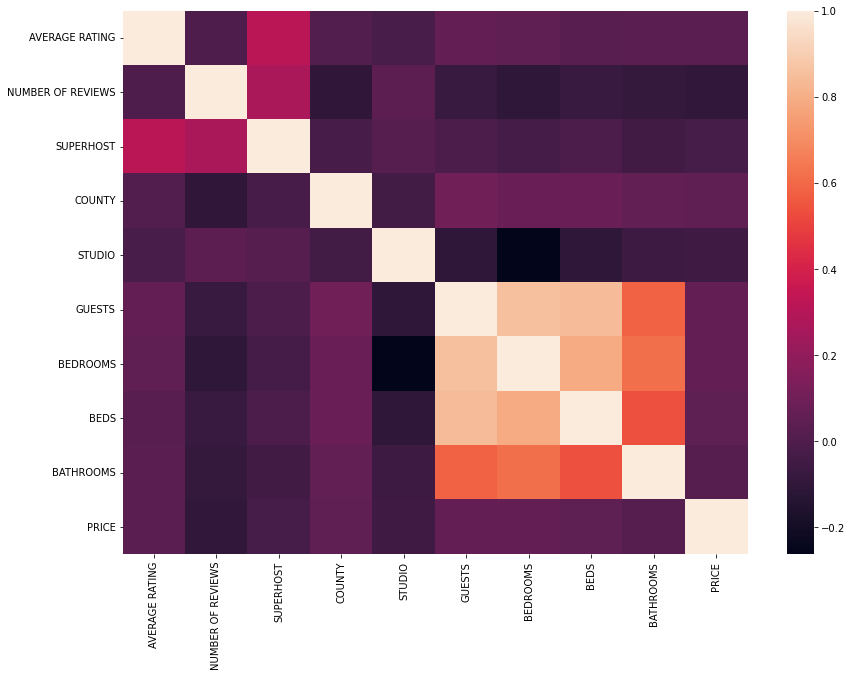

In [ ]:
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr());

In [ ]:
countyDict = {1 : "Antrim",
              2 : "Armagh",
              3 : "Carlow",
              4 : "Cavan",
              5 : "Clare",
              6 : "Cork",
              7 : "Donegal",
              8 : "Down",
              9 : "Dublin",
              10 : "Fermanagh",
              11 : "Galway",
              12 : "Kerry",
              13 : "Kildare",
              14 : "Kilkenny",
              15 : "Laois",
              16 : "Leitrim",
              17 : "Limerick",
              18 : "Londonderry",
              19 : "Longford",
              20 : "Louth",
              21 : "Mayo",
              22 : "Meath",
              23 : "Monaghan",
              24 : "Offaly",
              25 : "Roscommon",
              26 : "Sligo",
              27 : "Tipperary",
              28 : "Tyrone",
              29 : "Waterford",
              30 : "Westmeath",
              31 : "Wexford",
              32 : "Wicklow"}
for number, name in countyDict.items():
    print('{} {}'.format(number, name))

1 Antrim
2 Armagh
3 Carlow
4 Cavan
5 Clare
6 Cork
7 Donegal
8 Down
9 Dublin
10 Fermanagh
11 Galway
12 Kerry
13 Kildare
14 Kilkenny
15 Laois
16 Leitrim
17 Limerick
18 Londonderry
19 Longford
20 Louth
21 Mayo
22 Meath
23 Monaghan
24 Offaly
25 Roscommon
26 Sligo
27 Tipperary
28 Tyrone
29 Waterford
30 Westmeath
31 Wexford
32 Wicklow


In [ ]:
rowList=[]
for indexVal, rowVal in df.iterrows():
  rowList.append(countyDict[rowVal["COUNTY"]])

print(rowList)
dfGraph=df.copy()
dfGraph["COUNTY NAME"]=rowList 
dfGraph

['Sligo', 'Clare', 'Fermanagh', 'Kildare', 'Kilkenny', 'Down', 'Tyrone', 'Dublin', 'Carlow', 'Tipperary', 'Kildare', 'Limerick', 'Roscommon', 'Down', 'Dublin', 'Laois', 'Mayo', 'Waterford', 'Donegal', 'Dublin', 'Sligo', 'Cavan', 'Westmeath', 'Antrim', 'Kilkenny', 'Kerry', 'Dublin', 'Clare', 'Roscommon', 'Londonderry', 'Cork', 'Antrim', 'Cork', 'Tipperary', 'Tipperary', 'Roscommon', 'Waterford', 'Kerry', 'Armagh', 'Roscommon', 'Kilkenny', 'Fermanagh', 'Mayo', 'Clare', 'Meath', 'Limerick', 'Sligo', 'Cork', 'Kerry', 'Longford', 'Kerry', 'Wicklow', 'Fermanagh', 'Westmeath', 'Laois', 'Londonderry', 'Armagh', 'Waterford', 'Kilkenny', 'Meath', 'Roscommon', 'Roscommon', 'Wicklow', 'Galway', 'Sligo', 'Kerry', 'Waterford', 'Galway', 'Antrim', 'Wexford', 'Louth', 'Tipperary', 'Fermanagh', 'Roscommon', 'Waterford', 'Mayo', 'Clare', 'Mayo', 'Waterford', 'Wexford', 'Offaly', 'Galway', 'Tipperary', 'Limerick', 'Clare', 'Wexford', 'Dublin', 'Waterford', 'Limerick', 'Dublin', 'Londonderry', 'Dublin', '

,AVERAGE RATING,NUMBER OF REVIEWS,SUPERHOST,COUNTY,STUDIO,GUESTS,BEDROOMS,BEDS,BATHROOMS,PRICE,COUNTY NAME
0,4.750000,4,0,26,0,7,4,0,4,105,Sligo
1,5.000000,4,1,5,0,2,1,1,1,39,Clare
2,4.871076,1,1,10,0,4,2,2,2,116,Fermanagh
3,4.870000,38,0,13,0,1,1,1,1,31,Kildare
4,4.400000,92,0,14,0,8,4,6,4,86,Kilkenny
...,...,...,...,...,...,...,...,...,...,...,...
4840,4.900000,10,0,15,0,4,2,3,1,81,Laois
4841,5.000000,65,1,29,0,4,2,3,2,92,Waterford
4842,5.000000,24,1,16,0,4,2,3,2,124,Leitrim
4843,4.910000,45,1,10,0,2,1,2,1,61,Fermanagh


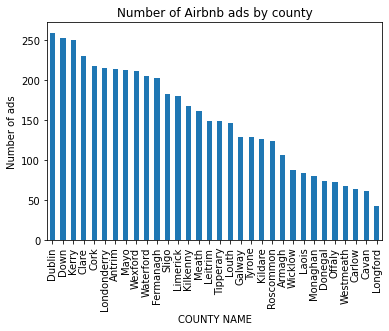

In [ ]:
dfGraph['COUNTY NAME'].value_counts().plot(kind='bar',xlabel="COUNTY NAME",ylabel="Number of ads",title="Number of Airbnb ads by county")

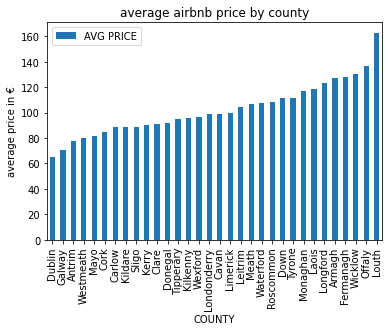

In [ ]:
res = []
for county in dfGraph["COUNTY NAME"].unique():
  currMean = dfGraph.loc[(dfGraph["COUNTY NAME"] == county),'PRICE'].mean()
  res.append([county,currMean])
meanDf = pd.DataFrame(res, columns =['COUNTY', 'AVG PRICE'])

meanDf.sort_values(by='AVG PRICE').plot.bar(x="COUNTY",y="AVG PRICE",ylabel="average price in €",title="average airbnb price by county")

In [ ]:
df.to_csv("group27Final.csv")

# Model

In [ ]:
df=pd.read_csv("group27Final.csv")
df=df.drop('Unnamed: 0', 1)  
df

,AVERAGE RATING,NUMBER OF REVIEWS,SUPERHOST,COUNTY,STUDIO,GUESTS,BEDROOMS,BEDS,BATHROOMS,PRICE
0,4.930000,30,1,10,0,0,0,0,0,403
1,4.920000,236,1,7,0,4,2,2,1,161
2,4.800000,15,1,3,0,2,1,1,1,99
3,4.871076,0,0,20,1,2,0,1,1,68
4,5.000000,50,1,10,0,8,4,5,3,173
...,...,...,...,...,...,...,...,...,...,...
4840,4.840000,76,0,32,0,2,1,1,1,60
4841,4.910000,164,1,28,0,4,1,4,1,118
4842,4.810000,42,1,25,0,2,1,1,1,59
4843,4.871076,2,1,18,0,3,1,2,1,96


In [ ]:
y = df['PRICE'] 
X = df.drop("PRICE",1)

In [ ]:
X

,AVERAGE RATING,NUMBER OF REVIEWS,SUPERHOST,COUNTY,STUDIO,GUESTS,BEDROOMS,BEDS,BATHROOMS
0,4.930000,30,1,10,0,0,0,0,0
1,4.920000,236,1,7,0,4,2,2,1
2,4.800000,15,1,3,0,2,1,1,1
3,4.871076,0,0,20,1,2,0,1,1
4,5.000000,50,1,10,0,8,4,5,3
...,...,...,...,...,...,...,...,...,...
4840,4.840000,76,0,32,0,2,1,1,1
4841,4.910000,164,1,28,0,4,1,4,1
4842,4.810000,42,1,25,0,2,1,1,1
4843,4.871076,2,1,18,0,3,1,2,1


In [ ]:
y

0       403
1       161
2        99
3        68
4       173
       ... 
4840     60
4841    118
4842     59
4843     96
4844     69
Name: PRICE, Length: 4845, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

In [ ]:
print("X Train Shape: {} \nX Test Shape: {} \ny Train Shape: {} \ny Test Shape: {}".format(X_train.shape, X_test.shape, y_train.shape, y_test.shape))

X Train Shape: (4360, 9) 
X Test Shape: (485, 9) 
y Train Shape: (4360,) 
y Test Shape: (485,)


## Lineer Regression

In [ ]:
model=LinearRegression()

In [ ]:
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
print(model.intercept_)
print(model.coef_)

-19.52638137190239
[ 23.38207359  -0.10053843  -3.86953859   0.44420903 -27.70895408
   4.97448427  -0.33392165  -2.40327827  -3.98640368]


In [ ]:
y_pred=model.predict(X_test)

In [ ]:
len(y_pred)

485

In [ ]:
dfModel=pd.DataFrame({'Real Values': y_test, 'Predicted Values': y_pred})
dfModel

,Real Values,Predicted Values
3206,150,113.332578
1684,71,86.154282
1044,93,104.838957
4144,69,94.771117
1538,77,111.945564
...,...,...
3252,64,92.048406
586,100,86.187603
3126,110,94.838783
151,343,81.393203


In [ ]:
print("Lineer Regression Model Score: {}\n".format(model.score(X_test, y_test)))

Lineer Regression Model Score: 0.006774923975897185



In [ ]:
print('MAE: {}'.format(metrics.mean_absolute_error(y_test, y_pred)))  
print('MSE: {}'.format(metrics.mean_squared_error(y_test, y_pred))) 
print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

MAE: 45.23588786958781
MSE: 9390.762546200172
RMSE: 96.90594690833052


### Remove Columns

In [ ]:
dfnew=df.copy()
cols=["BEDS", "SUPERHOST", "STUDIO"]
dfnew=dfnew.drop(cols, axis=1)
dfnew

,AVERAGE RATING,NUMBER OF REVIEWS,COUNTY,GUESTS,BEDROOMS,BATHROOMS,PRICE
0,4.930000,30,10,0,0,0,403
1,4.920000,236,7,4,2,1,161
2,4.800000,15,3,2,1,1,99
3,4.871076,0,20,2,0,1,68
4,5.000000,50,10,8,4,3,173
...,...,...,...,...,...,...,...
4840,4.840000,76,32,2,1,1,60
4841,4.910000,164,28,4,1,1,118
4842,4.810000,42,25,2,1,1,59
4843,4.871076,2,18,3,1,1,96


In [ ]:
y = dfnew['PRICE'] 
X = dfnew.drop("PRICE",1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

In [ ]:
model=LinearRegression()
model.fit(X_train, y_train)

print(model.intercept_)
print(model.coef_)

y_pred=model.predict(X_test)

-7.828046898854453
[20.31832452 -0.10675361  0.4595982   2.87698012  1.83318248 -4.91059261]


In [ ]:
print("Lineer Regression Model Score: {}\n".format(model.score(X_test, y_test)))

print('MAE: {}'.format(metrics.mean_absolute_error(y_test, y_pred)))  
print('MSE: {}'.format(metrics.mean_squared_error(y_test, y_pred))) 
print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

Lineer Regression Model Score: 0.012439208734723817

MAE: 45.10282640015656
MSE: 9337.207763454322
RMSE: 96.62922830828322


### LR with Polynomial Features 

In [ ]:
for i in range(2, 6):
    print("degree " + str(i))
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)
    
    polynomial_features= PolynomialFeatures(degree=i)
    X_poly_train = polynomial_features.fit_transform(X_train)
    X_poly_test = polynomial_features.fit_transform(X_test)

    model = LinearRegression()
    model.fit(X_poly_train, y_train)
    y_pred = model.predict(X_poly_test)
    
#     print("\n intercept: ")
#     print(model.intercept_)
#     print("\n coeff: ")
#     print(model.coef_)
    
    print(model.score(X_poly_test, y_test))
    print('MAE: {}'.format(metrics.mean_absolute_error(y_test, y_pred)))  
    print('MSE: {}'.format(metrics.mean_squared_error(y_test, y_pred))) 
    print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

degree 2
0.09104145612784909
MAE: 42.26208712643033
MSE: 8594.037802601855
RMSE: 92.70403336749624
degree 3
0.20594851372618683
MAE: 38.99892095811581
MSE: 7507.612460716558
RMSE: 86.64647979414143
degree 4
0.23517260439759358
MAE: 39.02618826897833
MSE: 7231.3039957487
RMSE: 85.03707424264255
degree 5
-0.43899434493776845
MAE: 48.28220772938835
MSE: 13605.42995222114
RMSE: 116.6423163016799


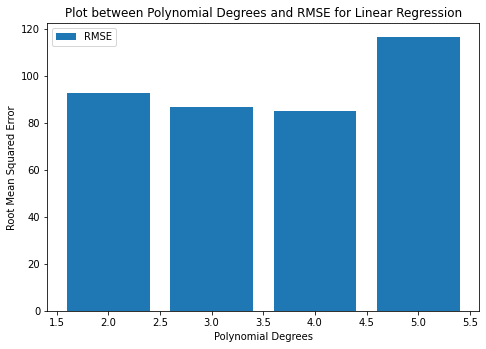

In [ ]:
degressList=[2,3,4,5]
rmses=[92.70, 86.64, 85.03, 116.64]

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(degressList,rmses)
plt.xlabel("Polynomial Degrees")
plt.ylabel("Root Mean Squared Error")
ax.legend(labels=['RMSE'])
plt.title("Plot between Polynomial Degrees and RMSE for Linear Regression")
plt.show()

#### Remove Columns

In [ ]:
dfnew=df.copy()
cols=["BEDS", "SUPERHOST", "STUDIO"]
dfnew=dfnew.drop(cols, axis=1)

y = dfnew['PRICE'] 
X = dfnew.drop("PRICE",1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

In [ ]:
dfnew

,AVERAGE RATING,NUMBER OF REVIEWS,COUNTY,GUESTS,BEDROOMS,BATHROOMS,PRICE
0,4.930000,30,10,0,0,0,403
1,4.920000,236,7,4,2,1,161
2,4.800000,15,3,2,1,1,99
3,4.871076,0,20,2,0,1,68
4,5.000000,50,10,8,4,3,173
...,...,...,...,...,...,...,...
4840,4.840000,76,32,2,1,1,60
4841,4.910000,164,28,4,1,1,118
4842,4.810000,42,25,2,1,1,59
4843,4.871076,2,18,3,1,1,96


In [ ]:
for i in range(2, 6):
    print("degree " + str(i))
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)
    
    polynomial_features= PolynomialFeatures(degree=i)
    X_poly_train = polynomial_features.fit_transform(X_train)
    X_poly_test = polynomial_features.fit_transform(X_test)

    model = LinearRegression()
    model.fit(X_poly_train, y_train)
    y_pred = model.predict(X_poly_test)
    
#     print("\n intercept: ")
#     print(model.intercept_)
#     print("\n coeff: ")
#     print(model.coef_)

    print(model.score(X_poly_test, y_test))
    print('MAE: {}'.format(metrics.mean_absolute_error(y_test, y_pred)))  
    print('MSE: {}'.format(metrics.mean_squared_error(y_test, y_pred))) 
    print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

degree 2
0.09104145612784909
MAE: 42.26208712643033
MSE: 8594.037802601855
RMSE: 92.70403336749624
degree 3
0.20594851372618683
MAE: 38.99892095811581
MSE: 7507.612460716558
RMSE: 86.64647979414143
degree 4
0.23517260439759358
MAE: 39.02618826897833
MSE: 7231.3039957487
RMSE: 85.03707424264255
degree 5
-0.43899434493776845
MAE: 48.28220772938835
MSE: 13605.42995222114
RMSE: 116.6423163016799


## Ridge Regression

In [ ]:
cValues = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]

In [ ]:
for i in range(2, 6):
    print("degree " + str(i))
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)
    
    polynomial_features= PolynomialFeatures(degree=i)
    X_poly_train = polynomial_features.fit_transform(X_train)
    X_poly_test = polynomial_features.fit_transform(X_test)
    
    for c in cValues:
        print("\n c: " + str(c))
        lasso = Lasso(alpha=1/c, max_iter=50000)
        model = lasso.fit(X_poly_train, y_train)
        y_pred = lasso.predict(X_poly_test)
    
        print(model.score(X_poly_test, y_test))
        print('MAE: {}'.format(metrics.mean_absolute_error(y_test, y_pred)))  
        print('MSE: {}'.format(metrics.mean_squared_error(y_test, y_pred))) 
        print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))  

degree 2

 c: 0.0001
0.005786985604375849
MAE: 46.425320331650056
MSE: 9400.103323916312
RMSE: 96.95412999927497

 c: 0.001
0.014185337008805421
MAE: 46.208085812269616
MSE: 9320.69843803259
RMSE: 96.54376436638769

 c: 0.01
0.02303931825480332
MAE: 44.38884720261388
MSE: 9236.985654820845
RMSE: 96.10923813463951

 c: 0.1
0.1111939762982238
MAE: 42.97254232054146
MSE: 8403.499387698901
RMSE: 91.67060263628085

 c: 1
0.1083942859948841
MAE: 41.77575697744836
MSE: 8429.969950591661
RMSE: 91.81486780795179

 c: 10
0.10516075775991063
MAE: 41.989232735246986
MSE: 8460.542372265329
RMSE: 91.98120662540435

 c: 100
0.1028552959509259
MAE: 42.169068298511924
MSE: 8482.340094584397
RMSE: 92.09962049099006

 c: 1000
0.10221542020459495
MAE: 42.13317850133671
MSE: 8488.39000344989
RMSE: 92.13245901119697
degree 3

 c: 0.0001
0.014530600967472718
MAE: 45.84649554257674
MSE: 9317.434030065178
RMSE: 96.52685652224037

 c: 0.001
0.049403930909597604
MAE: 43.29023103441933
MSE: 8987.71303470658
RMSE:

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.707e+07, tolerance: 4.799e+03
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


0.23273332468600472
MAE: 39.65459211945362
MSE: 7254.366942011586
RMSE: 85.17257153574492

 c: 1


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.808e+07, tolerance: 4.799e+03
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


0.22023481022772506
MAE: 38.85514766648228
MSE: 7372.538124245315
RMSE: 85.86348539539561

 c: 10


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.794e+07, tolerance: 4.799e+03
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


0.2331514486388343
MAE: 38.66728087743977
MSE: 7250.413656043798
RMSE: 85.14936086691314

 c: 100


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.787e+07, tolerance: 4.799e+03
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


0.23333291805971546
MAE: 38.660716971916024
MSE: 7248.697895656723
RMSE: 85.13928526630184

 c: 1000


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.786e+07, tolerance: 4.799e+03
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


0.23053182711719444
MAE: 38.7488203026425
MSE: 7275.181701338335
RMSE: 85.29467569161827
degree 4

 c: 0.0001


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.846e+07, tolerance: 4.799e+03
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


0.05642360950472591
MAE: 42.702225542910675
MSE: 8921.343249620833
RMSE: 94.45286258034128

 c: 0.001


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.094e+07, tolerance: 4.799e+03
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


0.1430057292164727
MAE: 41.613029547969724
MSE: 8102.725046570188
RMSE: 90.01513787452745

 c: 0.01


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.898e+07, tolerance: 4.799e+03
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


0.23417000781689834
MAE: 39.1849203913996
MSE: 7240.783364168022
RMSE: 85.09279266875674

 c: 0.1


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.779e+07, tolerance: 4.799e+03
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


0.2418901001507221
MAE: 38.138880277937126
MSE: 7167.791294503522
RMSE: 84.66280939411072

 c: 1


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.726e+07, tolerance: 4.799e+03
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


0.23278358646202002
MAE: 38.126709620177486
MSE: 7253.891726055904
RMSE: 85.1697817659286

 c: 10


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.710e+07, tolerance: 4.799e+03
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


0.2457024594409466
MAE: 37.8592473530945
MSE: 7131.746130421872
RMSE: 84.44966625405853

 c: 100


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.704e+07, tolerance: 4.799e+03
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


0.2446565160915546
MAE: 37.90757601653709
MSE: 7141.6353346596825
RMSE: 84.5081968489429

 c: 1000


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.703e+07, tolerance: 4.799e+03
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


0.24351776754441834
MAE: 37.95038081093509
MSE: 7152.401995172116
RMSE: 84.57187472896717
degree 5

 c: 0.0001


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.061e+07, tolerance: 4.799e+03
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


0.13456743980160213
MAE: 41.555538661532886
MSE: 8182.507539082732
RMSE: 90.45721385872291

 c: 0.001


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.896e+07, tolerance: 4.799e+03
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


0.20784975511849124
MAE: 40.36956859527989
MSE: 7489.63656895836
RMSE: 86.54268639786011

 c: 0.01


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.761e+07, tolerance: 4.799e+03
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


0.24137443831535
MAE: 38.99320170232377
MSE: 7172.666783420396
RMSE: 84.69159806864195

 c: 0.1


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.685e+07, tolerance: 4.799e+03
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


0.2086912958146312
MAE: 38.812975891123656
MSE: 7481.679954650907
RMSE: 86.49670487741662

 c: 1


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.662e+07, tolerance: 4.799e+03
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


0.1934487855315975
MAE: 39.181395896983496
MSE: 7625.795118606464
RMSE: 87.32579870007754

 c: 10


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.649e+07, tolerance: 4.799e+03
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


0.1890920364546813
MAE: 39.08609694718427
MSE: 7666.987389162573
RMSE: 87.5613350124504

 c: 100


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.643e+07, tolerance: 4.799e+03
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


0.18320591191993685
MAE: 39.10035496727987
MSE: 7722.639626663881
RMSE: 87.87855043560904

 c: 1000
0.18196060717660978
MAE: 39.13786747731963
MSE: 7734.413756641604
RMSE: 87.94551584158003


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.642e+07, tolerance: 4.799e+03
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


## Lasso Regression

In [ ]:
for i in range(2, 6):
    print("degree " + str(i))
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)
    
    polynomial_features= PolynomialFeatures(degree=i)
    X_poly_train = polynomial_features.fit_transform(X_train)
    X_poly_test = polynomial_features.fit_transform(X_test)
    
    for c in cValues:
        print("\n c: " + str(c))
        ridge = Ridge(alpha=1/(2*c), max_iter=50000)
        model = ridge.fit(X_poly_train, y_train)
        y_pred = ridge.predict(X_poly_test)

        print(model.score(X_poly_test, y_test))
        print('MAE: {}'.format(metrics.mean_absolute_error(y_test, y_pred)))  
        print('MSE: {}'.format(metrics.mean_squared_error(y_test, y_pred))) 
        print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))   

degree 2

 c: 0.0001
0.12062589318498773
MAE: 43.10342015576667
MSE: 8314.32232806036
RMSE: 91.18290589831166

 c: 0.001
0.10667444082395483
MAE: 42.728050055005426
MSE: 8446.23077405081
RMSE: 91.90337738108872

 c: 0.01
0.09465942316410181
MAE: 42.77715237604202
MSE: 8559.83058194505
RMSE: 92.5193524725776

 c: 0.1
0.09309869942505544
MAE: 42.89223979813398
MSE: 8574.586941190702
RMSE: 92.59906555247036

 c: 1
0.09208194929576818
MAE: 42.86771887859047
MSE: 8584.200128839142
RMSE: 92.65095859643948

 c: 10
0.09137506303388598
MAE: 42.7889089912607
MSE: 8590.883609948056
RMSE: 92.68701964109137

 c: 100
0.09119822328286697
MAE: 42.774378129430794
MSE: 8592.555597648161
RMSE: 92.69603873762978

 c: 1000
0.0911771824070482
MAE: 42.77287925807402
MSE: 8592.754535304235
RMSE: 92.69711179591431
degree 3

 c: 0.0001
0.2431593741932504
MAE: 38.878047318748166
MSE: 7155.79053915897
RMSE: 84.5919058726009

 c: 0.001
0.23166782079213943
MAE: 38.585546078883596
MSE: 7264.441087641692
RMSE: 85.231

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=4.00633e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=4.5304e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=4.40426e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=3.45103e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


0.19094410431331355
MAE: 37.3278430039143
MSE: 7649.476424226521
RMSE: 87.46128528798626

 c: 0.01
0.1779749514388782
MAE: 37.35225188723543
MSE: 7772.097407132753
RMSE: 88.15949981217426

 c: 0.1
0.1950875572154459
MAE: 37.379100143558425
MSE: 7610.300830230197
RMSE: 87.23703817891915

 c: 1
0.21285515129598842
MAE: 37.489066589617934
MSE: 7442.311457976774
RMSE: 86.2688324829818

 c: 10
0.2097183223344341
MAE: 37.719931543882744
MSE: 7471.969605598177
RMSE: 86.44055532907095

 c: 100
0.1821740600021795
MAE: 38.32663814898698
MSE: 7732.395598977115
RMSE: 87.93404118415754

 c: 1000
0.1548215565772002
MAE: 38.80692906953773
MSE: 7991.008546745536
RMSE: 89.39244121706004


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=3.18718e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=3.03287e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=2.92573e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=2.76316e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:156: LinAlgWarning: Ill-condit

### Lasso Regression (after removing unnecessary columns)

In [ ]:
dfLasso=df.copy()
y = dfLasso['PRICE']
# del df["AVERAGE RATING"]
# del df["SUPERHOST"]
# del df["NUMBER OF REVIEWS"]

del dfLasso["STUDIO"]
del dfLasso["SUPERHOST"]
del dfLasso["BEDS"]

In [ ]:
dfLasso

,AVERAGE RATING,COUNTY,STUDIO,GUESTS,BATHROOMS,PRICE
0,4.930000,10,0,0,0,403
1,4.920000,7,0,4,1,161
2,4.800000,3,0,2,1,99
3,4.871076,20,1,2,1,68
4,5.000000,10,0,8,3,173
...,...,...,...,...,...,...
4840,4.840000,32,0,2,1,60
4841,4.910000,28,0,4,1,118
4842,4.810000,25,0,2,1,59
4843,4.871076,18,0,3,1,96


In [ ]:
X = dfLasso.drop("PRICE",1)

cValues = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
mse_per_degree = []

for i in range(2, 5):
    print("degree " + str(i))
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)
    
    mse_list = []
    
    polynomial_features= PolynomialFeatures(degree=i)
    X_poly_train = polynomial_features.fit_transform(X_train)
    X_poly_test = polynomial_features.fit_transform(X_test)
    
    for c in cValues:
        print("\n c: " + str(c))
        lasso = Lasso(alpha=1/c, max_iter=50000)
        model = lasso.fit(X_poly_train, y_train)
        y_pred = lasso.predict(X_poly_test)
    
        #dfModel=pd.DataFrame({'Real Values': y_test, 'Predicted Values': y_pred})
        print(model.score(X_poly_test, y_test))
        print('MAE: {}'.format(metrics.mean_absolute_error(y_test, y_pred)))  
        print('MSE: {}'.format(metrics.mean_squared_error(y_test, y_pred))) 
        print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
        mse_list.append(metrics.mean_squared_error(y_test, y_pred))
    mse_per_degree.append(mse_list)
print(mse_per_degree)

degree 2

 c: 0.0001
-0.00019694208817133685
MAE: 46.96748321195497
MSE: 9456.680272496069
RMSE: 97.24546402015916

 c: 0.001
-0.00010780240005803243
MAE: 46.98934756526351
MSE: 9455.837472948695
RMSE: 97.24113056185996

 c: 0.01
0.009455739847309519
MAE: 44.91268300049615
MSE: 9365.415919452393
RMSE: 96.7750790206466

 c: 0.1
0.09738432798676522
MAE: 43.556360750958895
MSE: 8534.067102177643
RMSE: 92.38001462533789

 c: 1
0.09732231200425234
MAE: 42.65103038938143
MSE: 8534.65345201909
RMSE: 92.38318814599921

 c: 10
0.09424485833575702
MAE: 42.809917343890795
MSE: 8563.750217037808
RMSE: 92.54053283312025

 c: 100
0.09203902245971807
MAE: 42.85637397452809
MSE: 8584.605994270793
RMSE: 92.65314886322425

 c: 1000
0.09133205371113484
MAE: 42.77671619152049
MSE: 8591.29025527647
RMSE: 92.68921326279812
degree 3

 c: 0.0001
-0.000767063988682759
MAE: 46.99763718024246
MSE: 9462.070671429132
RMSE: 97.27317549781714

 c: 0.001
0.03570968324100099
MAE: 43.79921104331671
MSE: 9117.1896570844

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.271e+07, tolerance: 4.799e+03
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


0.22996998647405154
MAE: 38.53573790655209
MSE: 7280.493802488338
RMSE: 85.32580970895229

 c: 100


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.745e+07, tolerance: 4.799e+03
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


0.2274911362565426
MAE: 38.43565184322321
MSE: 7303.930880691605
RMSE: 85.4630380965456

 c: 1000


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.806e+07, tolerance: 4.799e+03
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


0.2241462786258358
MAE: 38.5449775323373
MSE: 7335.5559015645695
RMSE: 85.64785987731725
degree 4

 c: 0.0001
0.037913297036038074
MAE: 43.97176862790282
MSE: 9096.354889223454
RMSE: 95.37481265629545

 c: 0.001
0.14496898517711376
MAE: 41.26845907937758
MSE: 8084.162818341322
RMSE: 89.91197260844254

 c: 0.01
0.2240602598761714
MAE: 39.57128675380715
MSE: 7336.369193206231
RMSE: 85.6526076264245

 c: 0.1


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.464e+07, tolerance: 4.799e+03
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


0.2263845768806726
MAE: 38.22798539682287
MSE: 7314.3931984410365
RMSE: 85.52422579854807

 c: 1


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.747e+07, tolerance: 4.799e+03
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


0.25207627711431413
MAE: 37.722018042650404
MSE: 7071.4828429473255
RMSE: 84.09210927873866

 c: 10


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.747e+07, tolerance: 4.799e+03
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


0.26277174599127195
MAE: 37.66201270689398
MSE: 6970.359128928904
RMSE: 83.4886766509621

 c: 100


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.749e+07, tolerance: 4.799e+03
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


0.26231702843183713
MAE: 37.736741570538065
MSE: 6974.6584007951915
RMSE: 83.51442031646506

 c: 1000
0.26168769537416137
MAE: 37.78358051130786
MSE: 6980.6086304558885
RMSE: 83.55003668734017
[[9456.680272496069, 9455.837472948695, 9365.415919452393, 8534.067102177643, 8534.65345201909, 8563.750217037808, 8584.605994270793, 8591.29025527647], [9462.070671429132, 9117.189657084493, 8200.49552553495, 7277.380057776922, 7401.593578585012, 7280.493802488338, 7303.930880691605, 7335.5559015645695], [9096.354889223454, 8084.162818341322, 7336.369193206231, 7314.3931984410365, 7071.4828429473255, 6970.359128928904, 6974.6584007951915, 6980.6086304558885]]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.748e+07, tolerance: 4.799e+03
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


In [ ]:
df

,AVERAGE RATING,NUMBER OF REVIEWS,SUPERHOST,COUNTY,STUDIO,GUESTS,BEDROOMS,BEDS,BATHROOMS,PRICE
0,4.930000,30,1,10,0,0,0,0,0,403
1,4.920000,236,1,7,0,4,2,2,1,161
2,4.800000,15,1,3,0,2,1,1,1,99
3,4.871076,0,0,20,1,2,0,1,1,68
4,5.000000,50,1,10,0,8,4,5,3,173
...,...,...,...,...,...,...,...,...,...,...
4840,4.840000,76,0,32,0,2,1,1,1,60
4841,4.910000,164,1,28,0,4,1,4,1,118
4842,4.810000,42,1,25,0,2,1,1,1,59
4843,4.871076,2,1,18,0,3,1,2,1,96


In [ ]:
# recreate the changed value with the original
y = df['PRICE'] 
X = df.drop("PRICE",1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

### Plot between cvalues and mse

In [ ]:
import matplotlib.pyplot as plt

rmse_per_degree = [[89.20245908775314, 88.60636515176839, 87.46206806957878, 
                   83.2373312409223, 82.79696216830853, 82.86191167412443], [88.72471631234717, 
                  86.3726263620848, 82.69981497684851, 79.04142598950274, 
                  82.8522726156759, 83.85634705224062], [86.54324653081191, 81.9795842369318, 
                                       81.20003050523002, 78.01774763401167, 
                                       95.5114542552537, 112.84692944892933]]

rmse_ridge = [[82.65571209058965, 82.79735392103686, 83.11172023055393, 
               83.11070757845131, 83.24751101344859, 83.34313495066662], [81.811462076673, 83.2965585776475, 
            84.66085195461181, 85.80389748396875, 86.12697627243622, 85.83223125889289
                                                                         ], [183.4453141029867, 
            142.78284307420046, 79.76596155151823, 82.81996013808586, 
                87.2581025083961, 91.14084543828501]]

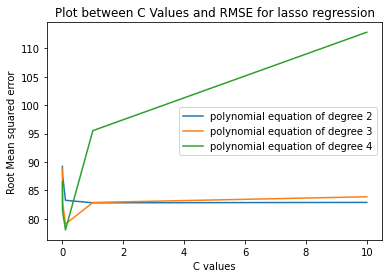

In [ ]:
import matplotlib.pyplot as plt
cValues = [0.0001, 0.001, 0.01, 0.1, 1, 10]

for i in range(0, 3): #degree
    mse_temp_list = rmse_per_degree[i]
    # print(mse_temp_list)
    plt.plot(cValues, rmse_per_degree[i], label=f"polynomial equation of degree {i+2}")
    plt.xlabel("C values")
    plt.ylabel("Root Mean squared error")
    plt.title(f"Plot between C Values and RMSE for lasso regression")
plt.legend()    
plt.show()

for i in range(0, 3): #degree
    mse_temp_list = rmse_ridge[i]
    # print(mse_temp_list)
    plt.plot(cValues, rmse_ridge[i], label=f"polynomial equation of degree {i+2}")
    plt.xlabel("C values")
    plt.ylabel("Root Mean squared error")
    plt.title(f"Plot between C Values and RMSE for ridge regression")
plt.legend()    
plt.show()

## kNN

In [ ]:
df

,AVERAGE RATING,NUMBER OF REVIEWS,SUPERHOST,COUNTY,STUDIO,GUESTS,BEDROOMS,BEDS,BATHROOMS,PRICE
0,4.930000,30,1,10,0,0,0,0,0,403
1,4.920000,236,1,7,0,4,2,2,1,161
2,4.800000,15,1,3,0,2,1,1,1,99
3,4.871076,0,0,20,1,2,0,1,1,68
4,5.000000,50,1,10,0,8,4,5,3,173
...,...,...,...,...,...,...,...,...,...,...
4840,4.840000,76,0,32,0,2,1,1,1,60
4841,4.910000,164,1,28,0,4,1,4,1,118
4842,4.810000,42,1,25,0,2,1,1,1,59
4843,4.871076,2,1,18,0,3,1,2,1,96


In [ ]:
y = df['PRICE'] 
X = df.drop("PRICE",1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selecti

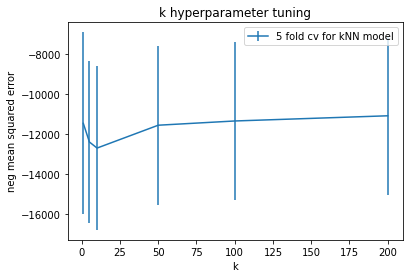

In [ ]:
mean_error=[]
std_error=[]
K_range = [1,5,10,50,100,200]
y_train.describe()

for Ki in K_range:
    model = KNeighborsClassifier(n_neighbors=Ki,weights='uniform').fit(X_train, y_train)
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    mean_error.append(np.array(scores).mean())
    std_error.append(np.array(scores).std())
plt.errorbar(K_range,mean_error,yerr=std_error)
plt.xlabel('k')
plt.ylabel('neg mean squared error')
plt.legend(['5 fold cv for kNN model'])
plt.title("k hyperparameter tuning")
plt.show()

In [ ]:
model = KNeighborsClassifier(n_neighbors=100,weights='uniform')
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
print("RMSE: {}".format(np.sqrt(mean_squared_error(y_test, y_pred))))

RMSE: 136.30551644901607


### kNN with dropped features

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selecti

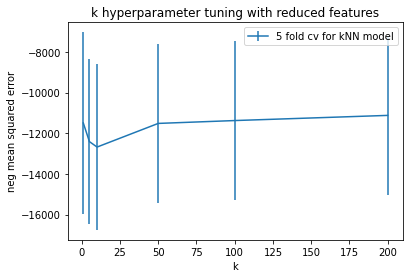

In [ ]:
dfReduced = df[['AVERAGE RATING','BEDROOMS','NUMBER OF REVIEWS','COUNTY',"GUESTS","BATHROOMS","PRICE"]].copy()
y = dfReduced['PRICE'] 
X = dfReduced.drop("PRICE",1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

mean_error=[]
std_error=[]
K_range = [1,5,10,50,100,200]
y_train.describe()
for Ki in K_range:
    model = KNeighborsClassifier(n_neighbors=Ki,weights='uniform').fit(X_train, y_train)
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    mean_error.append(np.array(scores).mean())
    std_error.append(np.array(scores).std())
plt.errorbar(K_range,mean_error,yerr=std_error)
plt.xlabel('k')
plt.ylabel('neg mean squared error')
plt.legend(['5 fold cv for kNN model'])
plt.title("k hyperparameter tuning with reduced features")
plt.show()

In [ ]:
dfReduced

,AVERAGE RATING,COUNTY,STUDIO,GUESTS,BATHROOMS,PRICE
0,4.930000,10,0,0,0,403
1,4.920000,7,0,4,1,161
2,4.800000,3,0,2,1,99
3,4.871076,20,1,2,1,68
4,5.000000,10,0,8,3,173
...,...,...,...,...,...,...
4840,4.840000,32,0,2,1,60
4841,4.910000,28,0,4,1,118
4842,4.810000,25,0,2,1,59
4843,4.871076,18,0,3,1,96


In [ ]:
model = KNeighborsClassifier(n_neighbors=100,weights='uniform')
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
print("RMSE: {}".format(np.sqrt(mean_squared_error(y_test, y_pred))))

RMSE: 136.42724733143666


## DummyRegressor Model

In [ ]:
df

,AVERAGE RATING,NUMBER OF REVIEWS,SUPERHOST,COUNTY,STUDIO,GUESTS,BEDROOMS,BEDS,BATHROOMS,PRICE
0,4.930000,30,1,10,0,0,0,0,0,403
1,4.920000,236,1,7,0,4,2,2,1,161
2,4.800000,15,1,3,0,2,1,1,1,99
3,4.871076,0,0,20,1,2,0,1,1,68
4,5.000000,50,1,10,0,8,4,5,3,173
...,...,...,...,...,...,...,...,...,...,...
4840,4.840000,76,0,32,0,2,1,1,1,60
4841,4.910000,164,1,28,0,4,1,4,1,118
4842,4.810000,42,1,25,0,2,1,1,1,59
4843,4.871076,2,1,18,0,3,1,2,1,96


In [ ]:
y = df['PRICE'] 
X = df.drop("PRICE",1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

In [ ]:
model=DummyRegressor(strategy="mean")
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

print("RMSE: {}".format(np.sqrt(mean_squared_error(y_test, y_pred))))
print("Model Score: {}".format(model.score(X_test, y_test)))

RMSE: 97.24546402015916
Model Score: -0.00019694208817133685


# Improving Results

## XGboost

In [ ]:
df

,AVERAGE RATING,NUMBER OF REVIEWS,SUPERHOST,COUNTY,STUDIO,GUESTS,BEDROOMS,BEDS,BATHROOMS,PRICE
0,4.930000,30,1,10,0,0,0,0,0,403
1,4.920000,236,1,7,0,4,2,2,1,161
2,4.800000,15,1,3,0,2,1,1,1,99
3,4.871076,0,0,20,1,2,0,1,1,68
4,5.000000,50,1,10,0,8,4,5,3,173
...,...,...,...,...,...,...,...,...,...,...
4840,4.840000,76,0,32,0,2,1,1,1,60
4841,4.910000,164,1,28,0,4,1,4,1,118
4842,4.810000,42,1,25,0,2,1,1,1,59
4843,4.871076,2,1,18,0,3,1,2,1,96


In [ ]:
y = df['PRICE'] 
X = df.drop("PRICE",1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

In [ ]:
model=XGBRegressor()

model.fit(X_train,y_train)
y_pred=model.predict(X_test)

print("RMSE: {}".format(np.sqrt(mean_squared_error(y_test, y_pred))))
print("Model Score: {}".format(model.score(X_test, y_test)))

[22:11:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE: 78.73349943475195
Model Score: 0.3443592686350735


In [ ]:
print(model.feature_importances_)

[0.03225722 0.12220866 0.02192967 0.2077236  0.00435155 0.29322296
 0.16316268 0.01772575 0.1374179 ]


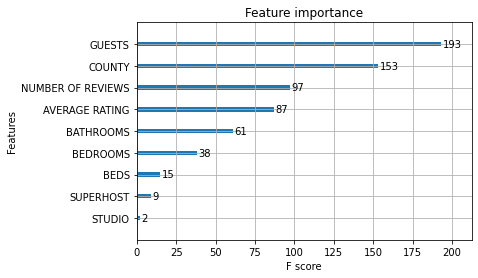

In [ ]:
plot_importance(model)
pyplot.show()

### GridSearchCV - XGboost

In [ ]:
model=XGBRegressor(silent=0)

parameters= {
    #"booster":["gblinear"],
    "n_estimators": np.arange(100, 450, 50),
    "objective":["reg:squarederror"],
    'colsample_bytree': [1,0.8,0.5],
    "min_child_weight":[1,3,5],
    'max_depth': np.arange(1,6,1),
    'alpha': [0,1],
    "gama":[0,0.3,0.5],
    "eta":[0.1,0.3],
    'lambda': [1,1.2],
    'subsample': [1,0.8,0.5,0.3,0.1]
}

best_parameters= {
    #"booster":["gblinear"],
    "n_estimators": [200],
    "objective":["reg:squarederror"],
    'colsample_bytree': [1],
    "min_child_weight":[1],
    'max_depth': [3],
    'alpha': [0],
    "gama":[0], #1
    "eta":[0.1],
    'lambda': [1],
    'subsample': [1]
}

gridModel=GridSearchCV(model, best_parameters, scoring="r2", cv=5)
gridModel.fit(X_train,y_train)
y_pred=gridModel.best_estimator_.predict(X_test)

In [ ]:
print("RMSE: {}".format(np.sqrt(mean_squared_error(y_test, y_pred))))
print("Model Score: {}".format(gridModel.best_estimator_.score(X_test, y_test)))

RMSE: 78.47017582366823
Model Score: 0.3487375061091037


In [ ]:
print("Best: ",(gridModel.best_params_))

Best:  {'alpha': 0, 'colsample_bytree': 1, 'eta': 0.1, 'gama': 0, 'lambda': 1, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 200, 'objective': 'reg:squarederror', 'subsample': 1}


### Remove Columns 

In [ ]:
dfnew=df.copy()
cols=["BEDS", "SUPERHOST", "STUDIO"]
dfnew=dfnew.drop(cols, axis=1)
dfnew

,AVERAGE RATING,NUMBER OF REVIEWS,COUNTY,GUESTS,BEDROOMS,BATHROOMS,PRICE
0,4.930000,30,10,0,0,0,403
1,4.920000,236,7,4,2,1,161
2,4.800000,15,3,2,1,1,99
3,4.871076,0,20,2,0,1,68
4,5.000000,50,10,8,4,3,173
...,...,...,...,...,...,...,...
4840,4.840000,76,32,2,1,1,60
4841,4.910000,164,28,4,1,1,118
4842,4.810000,42,25,2,1,1,59
4843,4.871076,2,18,3,1,1,96


In [ ]:
y = dfnew['PRICE'] 
X = dfnew.drop("PRICE",1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

In [ ]:
model=XGBRegressor(silent=0)

parameters= {
    #"booster":["gblinear"],
    "n_estimators": [200],
    "objective":["reg:squarederror"],
    'colsample_bytree': [1],
    "min_child_weight":[1],
    'max_depth': [3],
    'alpha': [0],
    "gama":[0], #1
    "eta":[0.1],
    'lambda': [1],
    'subsample': [1]
}

gridModel=GridSearchCV(model, parameters, scoring="r2", cv=5)
gridModel.fit(X_train,y_train)
y_pred=gridModel.best_estimator_.predict(X_test)

In [ ]:
print("RMSE: {}".format(np.sqrt(mean_squared_error(y_test, y_pred))))
print("Model Score: {}".format(gridModel.best_estimator_.score(X_test, y_test)))

RMSE: 79.66001122872113
Model Score: 0.32883771631223446
